 ## PROJET DE PRÉDICTION DU BITCOIN VIA TENSORFLOW & DEEP LEARNING 

**Introduction :**

La cryptomonnaie est devenue un sujet crucial dans le monde des investissements car les fluctuations constantes de ces devises numériques ont rendu difficile la tâche des traders pour prendre des décisions éclairées sur l'achat ou la vente de ces actifs, si bien que la prédiction des prix des cryptomonnaies est une question qui préoccupe beaucoup les investisseurs. La technologie de Deep Learning est une approche prometteuse pour résoudre ce problème et prédire avec précision le prix des cryptomonnaies.

Dans le cadre de notre projet de prédiction de cryptomonnaies, nous avons utilisé des méthodes de Deep Learning pour prédire le prix du Bitcoin. Notre objectif était de créer un modèle de prédiction robuste qui pourrait prédire avec précision le prix futur du Bitcoin en utilisant les données historiques de la cryptomonnaie.

Nos modèles utilisent plusieurs architectures de réseaux de neurones (LSTM, Conv1D, N-BEATS) qui sont des architectures de réseau de neurones capable de traiter et de prédire des séquences de données complexes. Nous avons formé notre modèle en utilisant des données historiques du prix du Bitcoin et avons testé son efficacité en utilisant des données en temps réel.


**Méthodes de prédictions des crytomonnaies**

Il existe plusieurs approches pour prédire le prix des crypto monnaies, notamment l'analyse technique, l'analyse fondamentale, l'apprentissage automatique et le Deep Learning. L'analyse technique consiste à étudier les graphiques de prix passés pour identifier des tendances et des modèles qui pourraient indiquer les mouvements futurs des prix. L'analyse fondamentale, quant à elle, consiste à étudier les fondamentaux économiques de la cryptomonnaie, tels que les facteurs économiques, politiques et sociaux, pour déterminer la valeur fondamentale de la cryptomonnaie.

L'apprentissage automatique et le Deep Learning sont des approches plus avancées pour prédire le prix des crypto monnaies. L'apprentissage automatique utilise des algorithmes d'apprentissage pour analyser les données historiques et identifier des modèles qui peuvent être utilisés pour prédire le prix futur. Le Deep Learning est une forme avancée d'apprentissage automatique qui utilise des réseaux de neurones artificiels pour apprendre et prédire des séquences de données complexes.

Dans cet projet, nous allons discuter en détail du processus de prédiction du prix des cryptomonnaies en utilisant un modèle de deep learning. Nous allons également explorer les meilleures expériences pour entraîner les modèles de deep learning, ainsi que les techniques d'analyse des données qui peuvent être utilisées pour améliorer la précision de la prédiction des prix. 

Nous avons utilisé le Bitcoin qui est la cryptomonnaie de référence sur les marchés financiers . Pour ce faire, nous avons téléchargé le jeu de données historiqes du __BTC__ depuis sa première cotation jusqu'au 12 février 2023. 

Sans plus tarder, importons nos données et manipulons les dans le but de prédire le prix du Bitcoin.

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [82]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

> Importation des données

Nous avons importé les données historiques du cours du Bitcoin depuis sa première cotation jusqu'au 12 février 2023. Nous allons nous servir de ces données pour essayer de prédire le prix du Bitcoin 

In [83]:
bitcoin_price = pd.read_csv('/Users/nacersere/Downloads/bitcoin_2009-01-01_2023-02-12.csv')

In [84]:
bitcoin_price.head() # 5 premières lignes 

,Date,Open,High,Low,Close,Volume,Market Cap
0,Feb-10-2023,21635.523600,21889.2509,21609.124000,21865.775300,6.926224e+10,4.169954e+11
1,Feb-09-2023,21788.528513,21933.0975,21488.466500,21648.284600,9.815650e+10,4.183807e+11
2,Feb-08-2023,22961.838300,22984.0285,21754.612606,21799.182108,8.545968e+10,4.330623e+11
3,Feb-07-2023,23251.869400,23373.5210,22719.144000,22949.213200,7.822022e+10,4.438828e+11
4,Feb-06-2023,22756.372000,23322.6114,22756.372000,23261.218600,7.319253e+10,4.416654e+11


In [85]:
bitcoin_price.info()  # informations sur le data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4593 non-null   object 
 1   Open        4593 non-null   float64
 2   High        4593 non-null   float64
 3   Low         4593 non-null   float64
 4   Close       4593 non-null   float64
 5   Volume      4593 non-null   float64
 6   Market Cap  4593 non-null   float64
dtypes: float64(6), object(1)
memory usage: 251.3+ KB


## Preprocessing des données : 
  
**Fonctions de preprocessing des données**

- Convertion de la colonne date dans la dataframe en type datetime avec __pd.to_datetime()__ : cela permet a pandas de convertir une chaine de caractère censée représenter une date en type __DatetimeIndex__ qui est le format standard de pandas en python pour stocker et manipuler les dates. 


- Nous allons trier la colonne date par odre croissant depuis le début de la première cotation du __BTC__ jusqu'à maintenant . Cela nous permettra de représenter graphiquement l'évolution du __BTC__ au travers du temps de manière chronologique. 


- Nous allons fixer la colonne date qui, rappelons le est de type __DatetimeIndex__ en indice. Cela nous permet de retrouver ou d'indexer comme dans Excel une ligne non plus au travers de son numéro mais au travers de la date. Cele nous assure que l'on travaille bien avec une série temporelle et que les données sont bien indexées par le temps. Cela peut etre fait au travers de la fonction __nom_du_dataframe.set_index()__ .


- Lorsque nous avons une série temporelle de prix, une étape crucuiale est de définir sa **fréquence** d'observation. La fréquence peut etre définie comme le nombre d'observation par unité de temps. Vu que le __BTC__ est échangé sur les exchanges et que les exchanges n'ouvrent pas les weeks-ends, il est important de définir une fréquence d'observation des données qui prend en compte les jours de marchés ou non. Dans notre cas, nous avons utilisé une fréquence de de **'B'** qui signifie Business Day ( littéralement jour de travail ). Il existe bien d'autres fréquences définies en Python en fonction de nos besoins, du phénomène rencontré et de la connaissance métier. Ci-joint une liste non exhaustive des alias de fréquence en série temporelle Python que l'on retrouve sur le site officiel pandas : https://pandas.pydata.org/pandas-docs/version/0.9.1/timeseries.html .


- Après la définition de la fréquence, nous allons voir s'il n'ya a pas eu augmentation ou diminution des observations lors du changement de fréquence des observations. Si tel est le cas, nous procédons a un calcul des données manquantes, sinon, on laisse les données comme telle puisqu'aucune donnée ne manque.


- Nous allons également représenter les données du prix de **cloture** du __BTC__ graphiquement avec la libraire __matplotlib__ de Python 

In [86]:
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])  # convertion de la date en type datetime 

In [87]:
bitcoin_price = bitcoin_price.sort_values('Date',ascending=True) # trie de la colonne date en ordre croissant 

In [88]:
bitcoin_price = bitcoin_price.set_index('Date')  # Définition de la date comme index du dataframe 

In [89]:
bitcoin_price = bitcoin_price.asfreq('B')

In [90]:
bitcoin_price.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [91]:
bitcoin_price.head()  # 5 premières lignes 

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-16,0.0500,0.0500,0.0500,0.0500,0.0,0.0
2010-07-19,0.0747,0.0747,0.0747,0.0747,0.0,0.0
2010-07-20,0.0792,0.0792,0.0792,0.0792,0.0,0.0
2010-07-21,0.0505,0.0505,0.0505,0.0505,0.0,0.0
2010-07-22,0.0626,0.0626,0.0626,0.0626,0.0,0.0


In [92]:
bitcoin_price.tail()  # 5 dernières lignes 

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-02-06,22756.372000,23322.6114,22756.372000,23261.218600,7.319253e+10,4.416654e+11
2023-02-07,23251.869400,23373.5210,22719.144000,22949.213200,7.822022e+10,4.438828e+11
2023-02-08,22961.838300,22984.0285,21754.612606,21799.182108,8.545968e+10,4.330623e+11
2023-02-09,21788.528513,21933.0975,21488.466500,21648.284600,9.815650e+10,4.183807e+11
2023-02-10,21635.523600,21889.2509,21609.124000,21865.775300,6.926224e+10,4.169954e+11


> Représentation graphique du jeu de données : Comment le bitcoin a évolué depuis le 16-07-2010 jusqu'au 10-02-2023

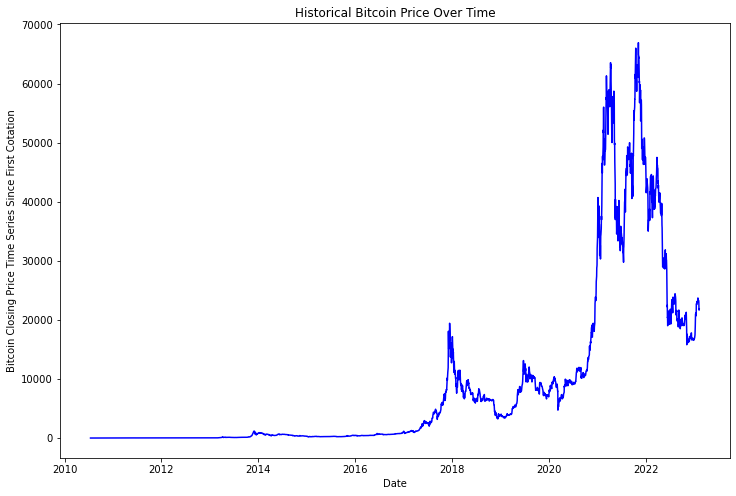

In [93]:
fig , ax = plt.subplots(figsize=(12,8))
ax.plot(bitcoin_price.index,bitcoin_price.Close,color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Closing Price Time Series Since First Cotation')
ax.set_title('Historical Bitcoin Price Over Time')
ax.grid(False)
plt.show()

> Dans la suite de notre projet, nous allons seulement comme il est de coutume, retenir seulement la colonne Close des données historiques pour effectuer notre modélisation et nos prédictions car cette dernière est pertinente et contient les informations majeures du __BTC__ sur le marché en tant que prix. 

In [94]:
bitcoin_price = bitcoin_price.loc[:,['Close']]

In [95]:
bitcoin_price.head()

,Close
Date,
2010-07-16,0.0500
2010-07-19,0.0747
2010-07-20,0.0792
2010-07-21,0.0505
2010-07-22,0.0626


**Séparation de la base de données en base d'entrainement et de test**

Nous allons tenter de subdiviser notre base de données en base d'entrainement et en base de test. Notre objectif étant de prédire le cours du __BTC__ avec de réseaux de neurones, nous devons pour ce faire subdiviser notre base de donnée en deux :

- Une base d'entrainement : C'est la base sur laquelle nous allons entrainer notre modèle de réseaux de neurones. Nous allons faire apprendre a ce dernier a découvrir le type de relations mathématiques, donc de modèle mathémathique qui existe entre le prix du __BTC__ par exemple le huitème jour sur base des 7 derniers jours avant. Autrement dit, on essaie de trouver la relation mathématique au travers d'un réseau de neurones entre le prix observé le 8ième jour de cotation du __BTC__ (ou le 31ième, ou le 41ième, ou le 51ième jour, etc...) et les 7 derniers jours ( ou les 30, 40 ou 50 derniers ) de cotation historique avant. Cette phase est essentiellement une phase de modélisation. 



- Une base de test : Une fois la relation/l'équation mathématique qui gouverne les prix historiques du __BTC__ est découverte, cette dernière permetterait de prendre **historiquement** 07 jours observés(ou les 30, ou les 40, ou les 50, etc...) de la base de test du prix du __BTC__ pour prédire le prix du 8ième (ou le 31ième, ou le 41ième, ou le 51ième, etc..) jour correspondant au prix **donné** par le modèle. Vu que nous travaillons sur des données observées historiquement sur le marché et que de fait nous avons les vrais valeurs, nous allons ainsi quantifier a quel point notre réseau de neurones performe ou pas via des métriques en comparant **les résultats** que notre modèle nous donne et **les observations** réalisées sur le marché au travers de la base de test. 

Pour subdiviser nos données nous allons prendre 80% des données comme base d'entrainement et 20% des données comme la base de test. 

**Convertion de la colonne de Prix Close et de l'indice de la colonne en numpy array**

In [96]:
# Convertissons l'indice du BTC et la colonne de prix sous forme de numpy array
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2010-07-16T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
        '2010-07-20T00:00:00.000000000', '2010-07-21T00:00:00.000000000',
        '2010-07-22T00:00:00.000000000', '2010-07-23T00:00:00.000000000',
        '2010-07-26T00:00:00.000000000', '2010-07-27T00:00:00.000000000',
        '2010-07-28T00:00:00.000000000', '2010-07-29T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.05  , 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.06  , 0.0589,
        0.0699, 0.0627]))

**Code de Subdivision de notre base de données en base de données d'entrainement et de test**

In [97]:
# Subdivision des données en données d'entrainement et de données de test
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Creation des données d'entrainement (tout ce qui vient avant split_size)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create des données de test (tout ce qui vient après split-size)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     

(2624, 657, 2624, 657)

**Représentation graphique de la base d'entrainement et de test**

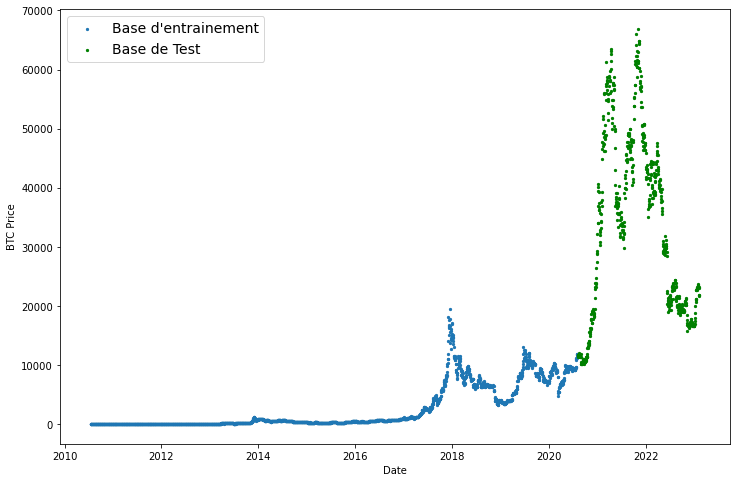

In [98]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, s=5, label="Base d'entrainement")
plt.scatter(X_test, y_test, s=5, label="Base de Test",color='green')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.grid(False)
plt.show();     

> Nous allons utilisé une réseau de neurones pour apprendre la relation mathématique sur la partie bleue du graphe et essayer de voir a quel point ce dernier reproduit la partie en vert pour __quantifier__ l'erreur et évaluer le pouvoir prédictif de notre modèle pour pouvoir prédire convenablement le __BTC__ .

Nous allons créer une fonction permettant d'afficher les graphes. Cette dernière nous sera utile car il nous suffira d'appeler cette fonction plutot que de réecrire a chaque fois des lignes de code pour plotter les fonctions et prédictions de nos réseaux de neurones. Cela nous permettra de scaler notre code et gagner en productivité.

In [99]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None, color=None):
    
    
    plt.plot(timesteps[start:end], values[start:end], format, color = color, label=label)
    plt.xlabel('Date')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(False)

Testons notre fonction !!!

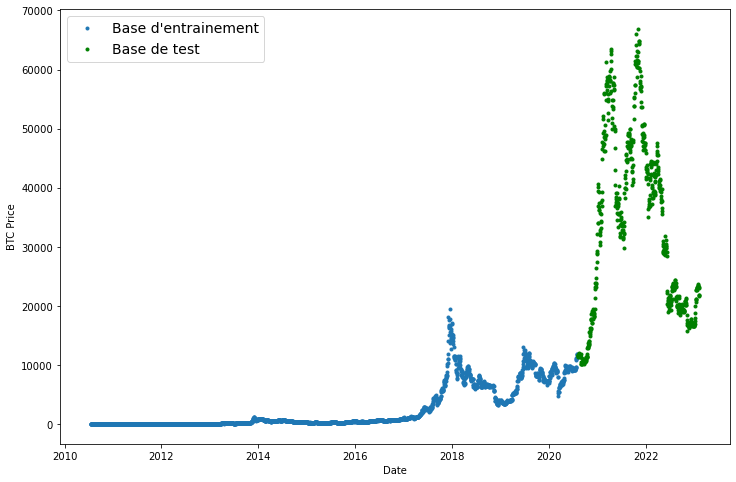

In [100]:
plt.figure(figsize=(12, 8))
plot_time_series(timesteps=X_train, values=y_train, label="Base d'entrainement")
plot_time_series(timesteps=X_test, values=y_test, label="Base de test",color='green')

Comme nous le voyons, en deux lignes de codes, nous affichons nos données . 

# STRATÉGIE DE MODÉLISATION ET DE PRÉDICTION DU PRIX DU BTC TOUT AU LONG DE NOTRE PROJET

Notre stratégie de modélisation et de prédicition du prix du __BTC__ se fera comme suit : 

> Notre projet se veut avant tout de mettre en lumière une diversité de modèle de deep learning que l'on pourrait utiliser pour prédire le jeu de données du prix du __BTC__. Puis dans un second temps, nous allons comparer la performance globale de chaque modèle de deep learning sur notre jeu de données tout en prenant également le soin de comparer les prédictions de chaque modèle entre eux.

Avant d'entrer cependant dans le vif du sujet, il est important de rappeler deux notions qui seront indispensables lors de nos expériences de deep learning: 

- Le **Window** : qui représente la fenetre/la quantité de jeu de données historiques que l'on va considérer pour prédire le ième jour correspondant, i étant un jour de cotation du prix du __BTC__ sur le marché. Par exemple, 1 semaine de données pour prédire le 8 ième correspondant, etc....

- Le **Horizon** : qui représente la durée de projection de nos prédictions du prix du __BTC__. Autrement dit, sur quelle période voulons-nous projeter nos prédictions ? 1 jour ? , 2 jours ? , 1 semaine ? , etc.... 

Si par exemple nous utilisons 7 jours de données du prix du Bitcoin pour prédire le 8ième jour, alors nous dirons que notre Window sera de 7 jours et notre horizon sera de 1 jour. Intuitivement, plus l'horizon de prédictions est grand, moins les valeurs observées seront fiables. Il est plus facile de prédire sur 1 jour le prix du Bitcoin que 1 semaine entière ......

**Voici comment nous allons procéder globalement pour prédire le prix du __BTC__ dans notre projet :**

- **Dans une première phase, nous allons implémenter plusieurs modèles de DL ayant pour but justement de modéliser notre série temporelle de prix du __BTC__ et comparer leurs performances entre elles via des métriques que nous aurons pris le soin nous meme de recoder ;** 


- **Dans une seconde phase, nous allons utiliser tous nos modèles concus pour prédire proprement dit le prix futur du __BTC__ a partir du 13 janvier 2023 et comparer la prédiction de chaque modèle avec les autres et tirer une conclusion globale sur notre projet**

**Ainsi la toute première partie de notre projet se veut une partie de test et de découverte des modèles de DL que l'on peut utiliser pour tacler ce genre de problèmes. En effet, la première partie aura pour objectif majeur de voir quels sont les possibilités qui nous sont offertes par l'intelligence artificielle pour prédire une série temporelle puis via des métriques, nous allons quantifier la performance de chacun d'eux et leurs validités d'utilisation . La seconde partie se veut une partie de comparaison et de vraisemblance de la prédiction de chaque modèle préalablement concu. Cette dernière nous montrera la capacité que ces modèles ont a imaginer le futur d'un système ouvert comme le __BTC__ .**

Sans plus tarder, nous allons passer a notre tout premier modèle.....

## Modèle 0 : Le modèle Naif 

Le modèle naif est un modèle qui est très utilisé dans la prédiction des séries temporelles financières. le principe est le suivant : **La meilleure estimation que l'on a du future est la toute dernière valeur observée sur le marché**. Nous allons donc de ce fait, utiliser ce modèle qui représentera notre tout premier pour essayer de prédire le prix du __BTC__.

Mathématiquement cela donne  : $$\hat{y}_{t} = \hat{y}_{t-1}$$

In [101]:
# Création d'une prédiction naive
predictions_naive = y_test[:-1] # La prévision naïve consiste à prendre toutes les valeurs sauf la dernière.
predictions_naive[:10], predictions_naive[-10:] # Observation des 10 premières valeurs et des 10 dernières

(array([11583.15927375, 11728.58522691, 11395.40581609, 11576.81426686,
        11763.00914103, 11742.87637386, 11865.38305274, 11961.99459978,
        11732.40556566, 11866.59519121]),
 array([23007.4396    , 23153.2004    , 23706.0643    , 23484.9488    ,
        23429.76      , 23315.8076    , 23261.2186    , 22949.2132    ,
        21799.18210785, 21648.2846    ]))

Faisons une représentation graphique pour mieux observée ce qui se passe grace a notre fonction customisée permettent de représenter visuellement les données .

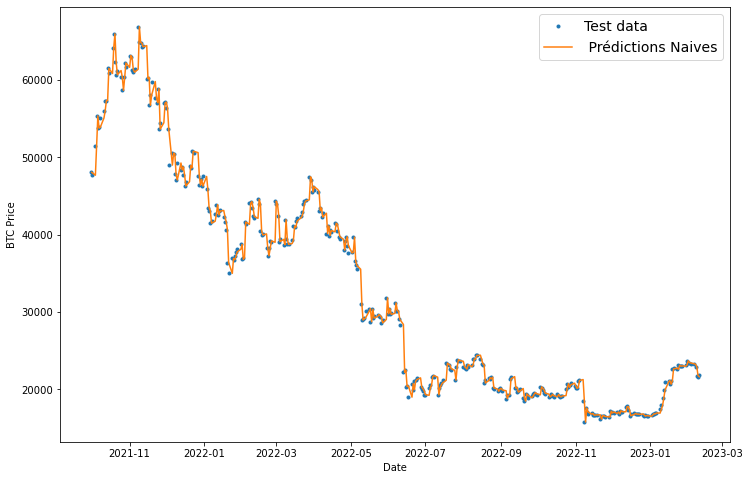

In [102]:
plt.figure(figsize=(12, 8))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=predictions_naive, format="-", start=offset, label=" Prédictions Naives")

**Évaluation de la performance de nos modèles de deep learning**

Pour quantifier a quelle point nos modèles de deep learning performent, nous devons utiliser pour ce faire des métriques qui quantifient l'erreur de prédictions ou d'apprentissage de nos modèles sur nos données. Vu que nous voulons prédire un nombre, nous faisons donc face a un problème de régression. Par conséquent, nous pouvons utiliser sans crainte, toutes les métriques de performance d'un modèle de régression linéaire. Dans notre projet, nous avons utilisé **05** métriques principales : 

- Le MAE ou Mean Absolute Error : Facile à interpréter (une prévision diffère de X montant par rapport à la valeur réelle). C'est la moyenne des valeurs absolues de toutes les érreurs de prévisions entre ce qui est réellement observé $y_{t}$ et ce qui est prédit par le modèle $\hat{y}_{t}$.


- Le MSE ou Mean Squared Error : C'est la moyenne du carré de toutes les érreurs de prévisions entre ce qui est réellement observé $y_{t}$ et ce qui est prédit par le modèle $\hat{y}_{t}$. Le carré aura tendance a amplifier l'effet des plus grandes erreurs. En effet, si nous avons par exemple, mal nettoyé nos données, un très grand MSE doit attirer notre attention qaunt a la validité d'une telle grande erreur. Mais attention, c'est avec le carré des erreurs que nous interprétons la performance de nos modèles en utilisant le MSE et donc potentiellement la qualité du nettoyage de nos données.  


- Le RMSE ou Root Mean Squared Error : C'est la racine carrée du MSE. Elle permet donc de ramener les erreurs sur une meme échelle de mésure que les données et donc d'interpréter non plus le carré des erreurs mais bien les erreurs réelles et donc de ne pas biaiser notre analyse. 


- Le MASE ou Mean Absolute Scaled Error : C'est une métrique utilisée dans les compétitions de prédicition de séries temporelles. Le MASE est égal à 1 pour la prévision naïve (ou très proche de 1). Une prévision qui se comporte mieux que la prévision naïve devrait avoir un MASE inférieur à 1. Comme nous le voyons, le MASE est une mésure qui prend comme benchmark le modèle naif que l'on a précédemment implémenté. En effet, le modèle naif est un modèle très difficile a battre. Pour des systèmes ouverts comme le __BTC__, nous allons tenter de challenger le modèle naif par d'autres modèles de réseaux de neurones pour voir si ces derniers font mieux ou pas !


- Le MAPE ou Mean Absolute Percentage Error : C'est une métrique utilisée dans les compétitions de prédiction de séries temporelles. C'est une métrique qui quantifie le pourcentage de performance que l'on gagne ou l'on perd dans nos différentes prédictions pour etre chirurgical dans ces derniers. Généralement dans les compétitions de prédictions de séries temporelles, cette métrique permet de départager les participants et est la principale pour ne pas dire la seule que les participants tentent de minimiser aux maximum. 


Contrairement a toutes les metriques qui sont déjà implémentées sur Tensorflow, le MASE ne l'est pas. Nous avons pris le soin de l'implémenter sur Tensorflow en utilisant exclusivement cette bibliothèque pour éviter les erreurs de typage en Python. 

In [103]:
def mean_absolute_scaled_error(y_true, y_pred):
    
    """
       Cette fonction calcule le Mean Absolute Scaled Error de tous nos futurs modèles de Deep Learning
       
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae / mae_naive_no_season

> Pour gagner en temps, scaler et faciliter notre analyse, nous allons créer une fonction qui nous retourne toutes les métriques de performance de nos modèles de Deep Learning dont nous aurons besoin. Dans ce projet, nous avons pris le soin de de créer et customiser entièrement nos métriques et modèle de zéro, et de créer des fonctions pythons qui nous permettent justement d'utiliser en une fois, tout ce dont nous aurons besoin.  

In [104]:
def evaluate_preds(y_true, y_pred):
    
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {'mae':mae.numpy(),
           'mse':mse.numpy(),
           'rmse':rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

> En pratique, si nous avons correctement créé la fonction qui calcule de MASE, le modèle naïf devrait obtenir un MASE de 1 (ou très proche de 1). Tout modèle qui se comporte moins bien que la prévision naïve atteindra un MASE supérieur à 1 et tout modèle qui se comporte mieux que la prévision naïve atteindra un MASE inférieur à 1. Testons notre modèle naif sur ces métriques.

In [105]:
resulats_preds_naive = evaluate_preds(y_true=y_test[1:],
                               y_pred=predictions_naive)
resulats_preds_naive

{'mae': 1060.3701,
 'mse': 2712415.5,
 'rmse': 1646.9413,
 'mape': 3.0119781,
 'mase': 0.9986844}

Comment pouvons nous savoir que notre modèle performe bien ou pas ? 
En la comparant aux performances des autres modèles de DL que l'on va dévélopper pour voir si dans l'optique de faire la meilleure prévision possible, il n'existe pas un autre modèle qui performe nettement mieux que le modèle naif et qui pourrait nous permettre justement de se projeter avec confiance dans le futur et donc de fait de prédire le prix du bitcoin. 

Dans le second modèle que nous allons utiliser, nous voulons utiliser un jeu de données historique de 1 semaine ou plus pour prédire un jour de __BTC__ price. Donc, notre objectif est d'utiliser une semaine de données ou plus pour prédire 1 jour pour voir si en considérant cette fois un historique de données nous arriverons a performer mieux que le modèle naif et donc par conséquent mieux prédire le prix du __BTC__.

> Nous allons utiliser dans le second modèle un **réseau de neurones denses ou encore les Fully-Connected-Neural-Networks**. Dans un tel réseau de neurones, tous les neurones sont **totalement et intégralement** connectés aux autres neurones des autres couches. 

## Modèle 1 : Window = 7, Horizon = 1 

Avant de se lancer immédiatement dans la modélisation par un réseau de neurones de notre jeu de données du __BTC__, il est important de faire des étapes de préprocessing complets et robustes qui nous faciliterons la tache dans le futur. Il sera important et crucial de répondre a des problématiques fondamentales qui caractérisent nos données. 

La problématique majeure a la quelle nous faisons face découle de deux facteurs :

- La nature des données : En effet, nous faisons face a une série temporelle, donc une séquence d'observations dans le temps. Pour chaque observation, nous avons le temps correspondant. Et nous voulons utiliser dans notre cas, un modèle de machine learning. Comment justement préprocesser nos données séquentielles de telle sorte que ces dernières soient compatibles d'une part déjà pour faire du machine learning ? Et d'autre part avec un réseau de neurones ?  


- Le type de solutions que l'on propose : Nous voulons prédire un nombre avons nous dit précedemment. Il s'agit donc d'un problème de régression, donc d'un problème de machine learning supervisé. Or, dans un problème de régression, nous avons une matrice X qui représente l'ensemble des observations et une matrice y qui représente les labels ou résulats afférents aux observations des individus qui représentent chaque ligne de la matrice X. 

Comment alors transformer/pré-processer nos données de telle sorte que ces dernières soient compatibles avec un réseau de neurones ? Cette phase est appelée **Fenêtrage de notre ensemble de données**. C'est le processus par lequel nous allons transformer **notre jeu de données séquentielles en données compatibles avec du machine learning supervisé.**

                                               
                                      L'idée du fenetrage est de passer
                                      de la séquence d'observation 
                                      
                                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] a celle ci : 
                        
                                      [0, 1, 2, 3, 4, 5, 6] -> [7]
                                      [1, 2, 3, 4, 5, 6, 7] -> [8]
                                      [2, 3, 4, 5, 6, 7, 8] -> [9]
                                    


Pour notre prix de __BTC__, voici a quoi cela ressemblerait :

                       
                                 on quitterait de notre serie de prix de Bitcoin de 
                       
                    [123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049, 125.961]
                       
                                                      a celle ci :  

                       [123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
                       [125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
                       [108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961] 
                       
                       
 Nous remarquons que dans notre exemple nous avons 1 semaine de données pour prédire 1 valeur : notre Window est donc de 7 et notre horizon est de 1. Nous allons écrire une fonction customisée qui permet en fonction de nos besoins de subdiviser a notre guise notre série séquentielle en créant la fenetre temporelle de notre choix ! : 7 jours, 30 jours, 50 jours, etc... qui nous servira de base pour prédire l'horizon temporelle a notre choix ! : 1 jour de prédiction, 07 jours de prédictions, 30 jours de prédictions !!! Mais avant de plonger dans le code, il est important de rappeler des caractéristiques de notre fenetrage :
 
- Notre fenetrage est coulissant : Si par exemple on souhaite avoir 1 semaine d'historique, on choisit les 7 premières observations, on les considère comme variables explicatives de notre 8ième obervation de prix qui représente la variable a expliquer et a prédire. Puis on recommence. On fait coulisser la fenetre sur les 7 obervations suivantes. La huitième observation qui représentait auparavant notre variable a expliquer et a prédire par les 7 premières observations se trouve par conséquent comme variable explicative et la 9 ième observation sera la variable a expliquer. Et ainsi de suite ....


- Notre méthode nous assure une chose importante : nous allons pouvoir **comparer** ce que notre modèle de deep learning nous donne et ce qui a été observé sur le marché. Donc voir a quel point notre modèle de DL peut **prédire** ce qui s'est déjà réalisé sur le marché. 

In [106]:
HORIZON = 1 # horizon de prédiction
WINDOW = 7 # utilisation de 1 semaine de données historiques

> Écrivons d'abord une fonction qui prend en entrée un tableau quelquonque et qui le convertit en Window and horizon

In [107]:
def get_labelled_windows(x, horizon=HORIZON):
    
    
    return x[:, :-horizon], x[:, -horizon:]

Testons notre fonction pour voir ce qu'elle retourne 

In [108]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


> Créons la fonction finale qui permet de faire le preprocessing en transformant la serie temporelle séquentielle en problème de machine learning supervisé. 

In [109]:
def make_windows(x, window_size=WINDOW, horizon=HORIZON):
    
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return windows, labels

In [110]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(3274, 3274)

A cette étape, full_windows et full_labels contiennent les données nécessaires a notre problème. full_windows représente la matrice X et chaque ligne représente 1 semaine de données historique et les full_labels représentent la matrice y et correspondent aux prix observés de 8ième jour correspondant. 

In [111]:
full_windows[1000:1010]

array([[448.903, 485.724, 491.77 , 524.579, 520.222, 525.138, 571.244],
       [485.724, 491.77 , 524.579, 520.222, 525.138, 571.244, 577.062],
       [491.77 , 524.579, 520.222, 525.138, 571.244, 577.062, 568.18 ],
       [524.579, 520.222, 525.138, 571.244, 577.062, 568.18 , 615.325],
       [520.222, 525.138, 571.244, 577.062, 568.18 , 615.325, 623.677],
       [525.138, 571.244, 577.062, 568.18 , 615.325, 623.677, 667.605],
       [571.244, 577.062, 568.18 , 615.325, 623.677, 667.605, 641.614],
       [577.062, 568.18 , 615.325, 623.677, 667.605, 641.614, 659.258],
       [568.18 , 615.325, 623.677, 667.605, 641.614, 659.258, 653.702],
       [615.325, 623.677, 667.605, 641.614, 659.258, 653.702, 654.969]])

In [112]:
len(full_windows[1]) # 1 semaine de données

7

In [113]:
full_labels[1000:1010]

array([[577.062],
       [568.18 ],
       [615.325],
       [623.677],
       [667.605],
       [641.614],
       [659.258],
       [653.702],
       [654.969],
       [653.15 ]])

In [114]:
len(full_labels[1])   # 1 jour de prédiction 

1

A ce stade de l'exposé, nous tenons a spécifier quelque chose de crucial ! Nous avons entré en paramètre de notre fonction make_windows(), le tableau de prix du __BTC__. Le paramètre x représente dans notre fonction make_windows(), le tableau de prix du __BTC__ converti en numpy_array car numpy est une libraire Python qui est optimisé pour les calculs et la création de tableau. Vu que le deep learning utilise des tenseurs, donc des tableaux multidimenionnels, il est important d'utiliser numpy et d'eviter d'utiliser des boucles pour optimiser le calcul. 

In [115]:
prices  # tablaux de prix du bitcoin depuis sa première cotation sous forme de numpy_array

array([5.00000000e-02, 7.47000000e-02, 7.92000000e-02, ...,
       2.17991821e+04, 2.16482846e+04, 2.18657753e+04])

In [116]:
(len(prices), 
len(bitcoin_price)) # Taille du jeu de donnée importée depuis l'ordinateur et le tableau de prix du BTC en array

(3281, 3281)

> De manière globale cela donne sous forme de machine learning supervisé : 

In [117]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0.05   0.0747 0.0792 0.0505 0.0626 0.0545 0.06  ] -> Label: [0.0589]
Window: [0.0747 0.0792 0.0505 0.0626 0.0545 0.06   0.0589] -> Label: [0.0699]
Window: [0.0792 0.0505 0.0626 0.0545 0.06   0.0589 0.0699] -> Label: [0.0627]


In [118]:
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [23153.2004 23706.0643 23484.9488 23429.76   23315.8076 23261.2186
 22949.2132] -> Label: [21799.18210785]
Window: [23706.0643     23484.9488     23429.76       23315.8076
 23261.2186     22949.2132     21799.18210785] -> Label: [21648.2846]
Window: [23484.9488     23429.76       23315.8076     23261.2186
 22949.2132     21799.18210785 21648.2846    ] -> Label: [21865.7753]


Notre fonction marche parfaitement. Nous voyons concrètement que notre fenetre (Window) est bien de 7 et notre horizon est d'1 jour. Si par exemple, on voulait un historique données de 50 jours et un horizon de prédiction de 1 mois donc se servir des 50 derniers jours de cotation du Bitcoin pour prédire un mois entier !, il nous suffirait de passer en argument de notre fonction 50 et 30. Cela donnerait : 

In [119]:
window_50, horizon_30 = make_windows(prices,window_size=50,horizon=30)
len(window_50),len(horizon_30)

(3202, 3202)

In [120]:
window_50[:1] # la première ligne de la matrice X qui est les 50 premières observations historique du BTC

array([[0.05  , 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.06  , 0.0589,
        0.0699, 0.0627, 0.0679, 0.06  , 0.057 , 0.061 , 0.0623, 0.059 ,
        0.07  , 0.067 , 0.07  , 0.0645, 0.067 , 0.07  , 0.068 , 0.0667,
        0.0655, 0.0664, 0.065 , 0.0648, 0.064 , 0.065 , 0.0641, 0.06  ,
        0.0629, 0.0634, 0.0609, 0.0624, 0.061 , 0.062 , 0.0611, 0.0618,
        0.0637, 0.062 , 0.0604, 0.0619, 0.059 , 0.061 , 0.0627, 0.0622,
        0.0623, 0.0622]])

In [121]:
len(window_50[1])  # 50 jours 

50

In [122]:
horizon_30[:1] # la matrice y qui sont les 30 obervations suivantes des 50 premières de la matrice X

array([[0.062 , 0.0619, 0.0619, 0.0619, 0.062 , 0.0614, 0.0614, 0.0628,
        0.067 , 0.0869, 0.0938, 0.0949, 0.105 , 0.102 , 0.105 , 0.101 ,
        0.097 , 0.099 , 0.107 , 0.1025, 0.1055, 0.1503, 0.1877, 0.1731,
        0.19  , 0.1989, 0.1938, 0.1931, 0.23  , 0.26  ]])

In [123]:
len(horizon_30[1])  # Un horizon temporelle de un mois de prediction ! 

30

Puisque nous travaillons avec des modèles de machine learning, une étape cruciale est donc de séparer nos données en données d'entrainement et en données de test. Cette étape permet de pouvoir quantifier la performance de notre modèle. Mais attention ! Vu que nous travaillons avec des données séquentielles, utiliser la fonction habituelle de train_test_split en Python s'avère fallacieux. En effet, bien que nous ayons représenté sous forme de matrice X et y la série temporelle des données, nous devons garder en tete que nous travaillons avec des données séquentielles et donc par conséquent les subdiviser de manière temporelle en deux jeux de données : 

- Un jeu de données d'entrainement : qui va représenter notre historique sur lequel va s'entrainer notre modèle

- Une jeu de données de test qui représente le **pseudo-futur** avec lequel on va comparer le **futur donné par notre modèle ( ce a quoi va ressembler le Bitcoin dans le futur selon le modèle )** et le **pseudo-futur ( ce qui s'est vraiment réalisé sur les marchés )** du jeu de test. 


L'idée est simple. On se place dans un environnement comme si on a une matrice X et des labels y. Vu que ces matrices sont le résultats d'une série temporelle donc de données séquentielles, nous devons créer une fonction de splitting des données de telle sorte a conserver l'ordre chronologique du temps ! Tout comme un modèle de machine learning ordinaire, mais sauf que ici on split les données de manière séquentielle sur base de la matrice X et y.

Ci-joint la fonction customisée qui permet de subdiviser en un ratio de 80-20% la base de données.

In [124]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
    split_size = int(len(windows) * (1-test_split))
    
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    
    return train_windows, test_windows, train_labels, test_labels

> Testons la fonction 

In [125]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2619, 655, 2619, 655)

Notre fonction prend en entrée les matrices X (full_windows) et y (full_labels), elles memes obtenues via une fonction sur notre série temporelle de prix. 

In [126]:
train_windows[:5] 

array([[0.05  , 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.06  ],
       [0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.06  , 0.0589],
       [0.0792, 0.0505, 0.0626, 0.0545, 0.06  , 0.0589, 0.0699],
       [0.0505, 0.0626, 0.0545, 0.06  , 0.0589, 0.0699, 0.0627],
       [0.0626, 0.0545, 0.06  , 0.0589, 0.0699, 0.0627, 0.0679]])

In [127]:
train_labels[:5]

array([[0.0589],
       [0.0699],
       [0.0627],
       [0.0679],
       [0.06  ]])

Ces dernières conservent toujours l'aspect des 1 semaine d'historique et 1 jour de prédiction.

Il est temps de passer a la modélisation de nos données par un réseau de neurones. Mais avant cela, il est important de vérifier une dernière chose indispensable a notre modélisation et dans l'étape de pré-processing. 

**Tracking des checkpoints de notre modèle de Deep Learning**

Comme les performances de notre modèle fluctueront d'une expérience à l'autre, nous voudrons nous assurer que nous comparons des pommes avec des pommes.

Ce que nous voulons dire par là, c'est que pour une comparaison équitable, nous voulons comparer les meilleures performances de chaque modèle que l'on cosntruira entre elles.

Par exemple, si le modèle_1 a très bien performé à l'itération 55 mais que ses performances ont diminué vers l'itération 100, nous voulons que la version du modèle de l'itération 55 soit comparée à d'autres modèles plutôt que la version du modèle de l'itération 100.

Et la même chose s'applique à chacun de nos autres modèles : comparer les meilleurs contre les meilleurs.

Pour cela, nous allons mettre en place un rappel (callback) ModelCheckpoint en Tensorflow.

Le callback ModelCheckpoint surveillera les performances de notre modèle pendant l'entraînement et sauvegardera le meilleur modèle dans un fichier en définissant le paramètre save_best_only=True.

Ainsi, lors de l'évaluation de notre modèle, nous pourrons restaurer sa configuration de meilleure performance à partir du fichier.

Comme nous allons exécuter plusieurs expériences, il est judicieux de les suivre en enregistrant les modèles dans des fichiers sous des noms différents.

Pour cela, nous allons écrire une petite fonction pour créer un callback ModelCheckpoint qui enregistre un modèle dans un fichier spécifié par son nom de fichier.

In [128]:
import os

def create_model_checkpoint(model_name, save_path='model_experiments'):
    
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                             verbose=0,
                                             save_best_only=True)

## Model 1 : Réseaux de neurones Dense ( window=7, horizon=1 )

Voici les caractéristiques de notre premier modèle de DL: 

- Une seule couche dense avec 128 unités cachées et une activation ReLU (Rectified Linear Unit).
- Une couche de sortie avec une activation linéaire (ou sans activation).
- L'optimiseur Adam et la fonction de perte MAE (erreur absolue moyenne).
- Taille de lot (batch size) de 128.
- 100 epochs

In [129]:
import tensorflow as tf
from tensorflow.keras import layers


tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                         
], name="model_1_dense") 


model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 9/21 [===========>..................] - ETA: 0s - loss: 2217.1794 - mae: 2217.1794

2023-03-12 21:33:07.791055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/21 [========================>.....] - ETA: 0s - loss: 1755.1675 - mae: 1755.1675

2023-03-12 21:33:08.099888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 42ms/step - loss: 1588.8047 - mae: 1588.8047 - val_loss: 2375.6265 - val_mae: 2375.6265
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 287.6837 - mae: 287.6837 - val_loss: 2844.7832 - val_mae: 2844.7832
Epoch 3/100
19/21 [==========================>...] - ETA: 0s - loss: 208.9136 - mae: 208.9136INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 208.4299 - mae: 208.4299 - val_loss: 2164.9060 - val_mae: 2164.9060
Epoch 4/100
19/21 [==========================>...] - ETA: 0s - loss: 192.8515 - mae: 192.8515INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 191.6873 - mae: 191.6873 - val_loss: 2072.1272 - val_mae: 2072.1272
Epoch 5/100
19/21 [==========================>...] - ETA: 0s - loss: 178.9044 - mae: 178.9044INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 34ms/step - loss: 178.0526 - mae: 178.0526 - val_loss: 1943.9498 - val_mae: 1943.9498
Epoch 6/100
19/21 [==========================>...] - ETA: 0s - loss: 166.7374 - mae: 166.7374INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 166.9347 - mae: 166.9347 - val_loss: 1879.5348 - val_mae: 1879.5348
Epoch 7/100
18/21 [========================>.....] - ETA: 0s - loss: 160.0730 - mae: 160.0730INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 159.0735 - mae: 159.0735 - val_loss: 1732.4154 - val_mae: 1732.4154
Epoch 8/100
19/21 [==========================>...] - ETA: 0s - loss: 155.6757 - mae: 155.6757INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 152.7384 - mae: 152.7384 - val_loss: 1670.3158 - val_mae: 1670.3158
Epoch 9/100
19/21 [==========================>...] - ETA: 0s - loss: 141.9562 - mae: 141.9562INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 142.4052 - mae: 142.4052 - val_loss: 1600.4114 - val_mae: 1600.4114
Epoch 10/100
18/21 [========================>.....] - ETA: 0s - loss: 132.3847 - mae: 132.3847INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 27ms/step - loss: 136.2072 - mae: 136.2072 - val_loss: 1458.6602 - val_mae: 1458.6602
Epoch 11/100
19/21 [==========================>...] - ETA: 0s - loss: 121.6355 - mae: 121.6355INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 123.7856 - mae: 123.7856 - val_loss: 1397.5388 - val_mae: 1397.5388
Epoch 12/100
18/21 [========================>.....] - ETA: 0s - loss: 118.0664 - mae: 118.0664INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 119.1855 - mae: 119.1855 - val_loss: 1362.9950 - val_mae: 1362.9950
Epoch 13/100
21/21 [==============================] - 0s 8ms/step - loss: 120.6650 - mae: 120.6650 - val_loss: 1401.2279 - val_mae: 1401.2279
Epoch 14/100
20/21 [===========================>..] - ETA: 0s - loss: 113.1762 - mae: 113.1762INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 113.4732 - mae: 113.4732 - val_loss: 1288.6537 - val_mae: 1288.6537
Epoch 15/100
21/21 [==============================] - 0s 8ms/step - loss: 110.2023 - mae: 110.2023 - val_loss: 1527.0138 - val_mae: 1527.0138
Epoch 16/100
19/21 [==========================>...] - ETA: 0s - loss: 122.0729 - mae: 122.0729INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 121.9846 - mae: 121.9846 - val_loss: 1255.1461 - val_mae: 1255.1461
Epoch 17/100
19/21 [==========================>...] - ETA: 0s - loss: 111.0495 - mae: 111.0495INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 111.8576 - mae: 111.8576 - val_loss: 1239.7729 - val_mae: 1239.7729
Epoch 18/100
21/21 [==============================] - 0s 7ms/step - loss: 109.1738 - mae: 109.1738 - val_loss: 1308.7660 - val_mae: 1308.7660
Epoch 19/100
21/21 [==============================] - 0s 7ms/step - loss: 109.8558 - mae: 109.8558 - val_loss: 1283.5256 - val_mae: 1283.5256
Epoch 20/100
20/21 [===========================>..] - ETA: 0s - loss: 105.6442 - mae: 105.6442INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 105.8777 - mae: 105.8777 - val_loss: 1238.8065 - val_mae: 1238.8065
Epoch 21/100
21/21 [==============================] - ETA: 0s - loss: 105.3922 - mae: 105.3922INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 105.3922 - mae: 105.3922 - val_loss: 1214.1318 - val_mae: 1214.1318
Epoch 22/100
21/21 [==============================] - 0s 7ms/step - loss: 107.2702 - mae: 107.2702 - val_loss: 1226.7141 - val_mae: 1226.7141
Epoch 23/100
20/21 [===========================>..] - ETA: 0s - loss: 105.3427 - mae: 105.3427INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 104.3727 - mae: 104.3727 - val_loss: 1204.6454 - val_mae: 1204.6454
Epoch 24/100
20/21 [===========================>..] - ETA: 0s - loss: 102.7680 - mae: 102.7680INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 102.7066 - mae: 102.7066 - val_loss: 1182.6350 - val_mae: 1182.6350
Epoch 25/100
21/21 [==============================] - 0s 8ms/step - loss: 103.0892 - mae: 103.0892 - val_loss: 1295.0138 - val_mae: 1295.0138
Epoch 26/100
21/21 [==============================] - 0s 10ms/step - loss: 107.1068 - mae: 107.1068 - val_loss: 1248.2924 - val_mae: 1248.2924
Epoch 27/100
21/21 [==============================] - 0s 7ms/step - loss: 109.4213 - mae: 109.4213 - val_loss: 1228.4872 - val_mae: 1228.4872
Epoch 28/100
21/21 [==============================] - 0s 7ms/step - loss: 107.9708 - mae: 107.9708 - val_loss: 1221.3359 - val_mae: 1221.3359
Epoch 29/100
21/21 [==============================] - 0s 7ms/step - loss: 102.6485 - mae: 102.6485 - val_loss: 1213.9569 - val_mae: 1213.9569
Epoch 30/100
20/21 [===========================>..] - ETA: 0s - loss: 102.6165 - mae: 102.6165INFO:tensorflow:Assets written to: model_experiments/model_1_dens

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 27ms/step - loss: 102.6168 - mae: 102.6168 - val_loss: 1152.3582 - val_mae: 1152.3582
Epoch 31/100
21/21 [==============================] - 0s 7ms/step - loss: 100.3005 - mae: 100.3005 - val_loss: 1155.3384 - val_mae: 1155.3384
Epoch 32/100
21/21 [==============================] - ETA: 0s - loss: 100.4103 - mae: 100.4103INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 27ms/step - loss: 100.4103 - mae: 100.4103 - val_loss: 1148.8104 - val_mae: 1148.8104
Epoch 33/100
21/21 [==============================] - 0s 9ms/step - loss: 99.9019 - mae: 99.9019 - val_loss: 1222.1598 - val_mae: 1222.1598
Epoch 34/100
21/21 [==============================] - 0s 9ms/step - loss: 115.2168 - mae: 115.2168 - val_loss: 1483.4932 - val_mae: 1483.4932
Epoch 35/100
21/21 [==============================] - 0s 7ms/step - loss: 101.7765 - mae: 101.7765 - val_loss: 1181.8751 - val_mae: 1181.8751
Epoch 36/100
21/21 [==============================] - 0s 7ms/step - loss: 103.1775 - mae: 103.1775 - val_loss: 1160.2635 - val_mae: 1160.2635
Epoch 37/100
21/21 [==============================] - 0s 8ms/step - loss: 100.0311 - mae: 100.0311 - val_loss: 1167.2572 - val_mae: 1167.2572
Epoch 38/100
16/21 [=====================>........] - ETA: 0s - loss: 98.7134 - mae: 98.7134  INFO:tensorflow:Assets written to: model_experiments/model_1_dense/a

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 37ms/step - loss: 98.5323 - mae: 98.5323 - val_loss: 1125.8911 - val_mae: 1125.8911
Epoch 39/100
21/21 [==============================] - 0s 7ms/step - loss: 98.8190 - mae: 98.8190 - val_loss: 1208.3717 - val_mae: 1208.3717
Epoch 40/100
19/21 [==========================>...] - ETA: 0s - loss: 98.5697 - mae: 98.5697  INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 29ms/step - loss: 97.8343 - mae: 97.8343 - val_loss: 1120.5101 - val_mae: 1120.5101
Epoch 41/100
21/21 [==============================] - 0s 9ms/step - loss: 97.7293 - mae: 97.7293 - val_loss: 1147.2206 - val_mae: 1147.2206
Epoch 42/100
20/21 [===========================>..] - ETA: 0s - loss: 100.6153 - mae: 100.6153INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 27ms/step - loss: 99.9799 - mae: 99.9799 - val_loss: 1113.9908 - val_mae: 1113.9908
Epoch 43/100
21/21 [==============================] - 0s 9ms/step - loss: 98.4120 - mae: 98.4120 - val_loss: 1143.7412 - val_mae: 1143.7412
Epoch 44/100
21/21 [==============================] - 0s 9ms/step - loss: 103.4710 - mae: 103.4710 - val_loss: 1344.8276 - val_mae: 1344.8276
Epoch 45/100
16/21 [=====================>........] - ETA: 0s - loss: 100.9333 - mae: 100.9333INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 41ms/step - loss: 98.6653 - mae: 98.6653 - val_loss: 1111.0795 - val_mae: 1111.0795
Epoch 46/100
21/21 [==============================] - 0s 10ms/step - loss: 98.1152 - mae: 98.1152 - val_loss: 1166.7588 - val_mae: 1166.7588
Epoch 47/100
21/21 [==============================] - 0s 10ms/step - loss: 97.4446 - mae: 97.4446 - val_loss: 1124.6974 - val_mae: 1124.6974
Epoch 48/100
21/21 [==============================] - 0s 11ms/step - loss: 95.2086 - mae: 95.2086 - val_loss: 1245.6350 - val_mae: 1245.6350
Epoch 49/100
21/21 [==============================] - 0s 11ms/step - loss: 99.3109 - mae: 99.3109 - val_loss: 1119.0374 - val_mae: 1119.0374
Epoch 50/100
21/21 [==============================] - ETA: 0s - loss: 96.6449 - mae: 96.6449INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 29ms/step - loss: 96.6449 - mae: 96.6449 - val_loss: 1105.3075 - val_mae: 1105.3075
Epoch 51/100
19/21 [==========================>...] - ETA: 0s - loss: 94.1112 - mae: 94.1112INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 29ms/step - loss: 96.0351 - mae: 96.0351 - val_loss: 1097.9858 - val_mae: 1097.9858
Epoch 52/100
21/21 [==============================] - 0s 9ms/step - loss: 96.9714 - mae: 96.9714 - val_loss: 1164.0981 - val_mae: 1164.0981
Epoch 53/100
16/21 [=====================>........] - ETA: 0s - loss: 99.0128 - mae: 99.0128INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 41ms/step - loss: 99.2411 - mae: 99.2411 - val_loss: 1093.1901 - val_mae: 1093.1901
Epoch 54/100
21/21 [==============================] - 0s 9ms/step - loss: 96.4255 - mae: 96.4255 - val_loss: 1129.2926 - val_mae: 1129.2926
Epoch 55/100
21/21 [==============================] - 0s 8ms/step - loss: 95.1396 - mae: 95.1396 - val_loss: 1176.6613 - val_mae: 1176.6613
Epoch 56/100
21/21 [==============================] - 0s 8ms/step - loss: 98.3819 - mae: 98.3819 - val_loss: 1119.6648 - val_mae: 1119.6648
Epoch 57/100
21/21 [==============================] - 0s 9ms/step - loss: 94.5047 - mae: 94.5047 - val_loss: 1093.8636 - val_mae: 1093.8636
Epoch 58/100
21/21 [==============================] - 0s 9ms/step - loss: 97.0135 - mae: 97.0135 - val_loss: 1095.2087 - val_mae: 1095.2087
Epoch 59/100
21/21 [==============================] - 0s 9ms/step - loss: 95.9188 - mae: 95.9188 - val_loss: 1117.8333 - val_mae: 1117.8333
Epoch 60/100
21/21 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 31ms/step - loss: 94.1262 - mae: 94.1262 - val_loss: 1085.0156 - val_mae: 1085.0156
Epoch 62/100
21/21 [==============================] - 0s 9ms/step - loss: 92.8529 - mae: 92.8529 - val_loss: 1090.2950 - val_mae: 1090.2950
Epoch 63/100
21/21 [==============================] - 0s 8ms/step - loss: 94.8247 - mae: 94.8247 - val_loss: 1105.3965 - val_mae: 1105.3965
Epoch 64/100
21/21 [==============================] - 0s 8ms/step - loss: 93.1448 - mae: 93.1448 - val_loss: 1150.2279 - val_mae: 1150.2279
Epoch 65/100
21/21 [==============================] - 0s 7ms/step - loss: 93.3006 - mae: 93.3006 - val_loss: 1087.9872 - val_mae: 1087.9872
Epoch 66/100
21/21 [==============================] - 0s 9ms/step - loss: 97.6671 - mae: 97.6671 - val_loss: 1258.5787 - val_mae: 1258.5787
Epoch 67/100
21/21 [==============================] - 0s 9ms/step - loss: 99.3122 - mae: 99.3122 - val_loss: 1171.4906 - val_mae: 1171.4906
Epoch 68/100
21/21 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 33ms/step - loss: 93.9279 - mae: 93.9279 - val_loss: 1083.2513 - val_mae: 1083.2513
Epoch 71/100
21/21 [==============================] - 0s 7ms/step - loss: 93.8276 - mae: 93.8276 - val_loss: 1116.3601 - val_mae: 1116.3601
Epoch 72/100
21/21 [==============================] - 0s 7ms/step - loss: 93.7913 - mae: 93.7913 - val_loss: 1096.1033 - val_mae: 1096.1033
Epoch 73/100
21/21 [==============================] - 0s 7ms/step - loss: 95.5948 - mae: 95.5948 - val_loss: 1094.2098 - val_mae: 1094.2098
Epoch 74/100
21/21 [==============================] - 0s 7ms/step - loss: 94.8370 - mae: 94.8370 - val_loss: 1086.6094 - val_mae: 1086.6094
Epoch 75/100
21/21 [==============================] - 0s 7ms/step - loss: 96.8362 - mae: 96.8362 - val_loss: 1268.4781 - val_mae: 1268.4781
Epoch 76/100
21/21 [==============================] - 0s 7ms/step - loss: 95.7203 - mae: 95.7203 - val_loss: 1092.5117 - val_mae: 1092.5117
Epoch 77/100
21/21 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 37ms/step - loss: 94.4878 - mae: 94.4878 - val_loss: 1077.1444 - val_mae: 1077.1444
Epoch 79/100
21/21 [==============================] - 0s 7ms/step - loss: 96.7348 - mae: 96.7348 - val_loss: 1240.6168 - val_mae: 1240.6168
Epoch 80/100
20/21 [===========================>..] - ETA: 0s - loss: 97.9088 - mae: 97.9088 INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 27ms/step - loss: 96.6479 - mae: 96.6479 - val_loss: 1067.7524 - val_mae: 1067.7524
Epoch 81/100
21/21 [==============================] - 0s 9ms/step - loss: 94.0370 - mae: 94.0370 - val_loss: 1075.4268 - val_mae: 1075.4268
Epoch 82/100
16/21 [=====================>........] - ETA: 0s - loss: 99.9048 - mae: 99.9048INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 38ms/step - loss: 97.2542 - mae: 97.2542 - val_loss: 1066.6372 - val_mae: 1066.6372
Epoch 83/100
21/21 [==============================] - 0s 8ms/step - loss: 93.1880 - mae: 93.1880 - val_loss: 1134.6732 - val_mae: 1134.6732
Epoch 84/100
21/21 [==============================] - 0s 9ms/step - loss: 96.8174 - mae: 96.8174 - val_loss: 1123.9823 - val_mae: 1123.9823
Epoch 85/100
21/21 [==============================] - 0s 8ms/step - loss: 92.1950 - mae: 92.1950 - val_loss: 1138.8158 - val_mae: 1138.8158
Epoch 86/100
21/21 [==============================] - 0s 9ms/step - loss: 92.6419 - mae: 92.6419 - val_loss: 1102.5688 - val_mae: 1102.5688
Epoch 87/100
21/21 [==============================] - 0s 9ms/step - loss: 90.9313 - mae: 90.9313 - val_loss: 1097.6628 - val_mae: 1097.6628
Epoch 88/100
15/21 [====================>.........] - ETA: 0s - loss: 91.0737 - mae: 91.0737INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 30ms/step - loss: 94.3978 - mae: 94.3978 - val_loss: 1066.0917 - val_mae: 1066.0917
Epoch 89/100
21/21 [==============================] - 0s 9ms/step - loss: 93.9109 - mae: 93.9109 - val_loss: 1115.4863 - val_mae: 1115.4863
Epoch 90/100
21/21 [==============================] - 0s 8ms/step - loss: 91.5958 - mae: 91.5958 - val_loss: 1084.4590 - val_mae: 1084.4590
Epoch 91/100
21/21 [==============================] - 0s 7ms/step - loss: 91.1214 - mae: 91.1214 - val_loss: 1075.3477 - val_mae: 1075.3477
Epoch 92/100
21/21 [==============================] - 0s 7ms/step - loss: 92.4476 - mae: 92.4476 - val_loss: 1111.2141 - val_mae: 1111.2141
Epoch 93/100
21/21 [==============================] - 0s 8ms/step - loss: 90.7737 - mae: 90.7737 - val_loss: 1094.8389 - val_mae: 1094.8389
Epoch 94/100
19/21 [==========================>...] - ETA: 0s - loss: 93.1929 - mae: 93.1929INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


21/21 [==============================] - 1s 26ms/step - loss: 91.9167 - mae: 91.9167 - val_loss: 1062.3967 - val_mae: 1062.3967
Epoch 95/100
21/21 [==============================] - 0s 7ms/step - loss: 91.9272 - mae: 91.9272 - val_loss: 1081.4393 - val_mae: 1081.4393
Epoch 96/100
21/21 [==============================] - 0s 7ms/step - loss: 96.6387 - mae: 96.6387 - val_loss: 1108.0311 - val_mae: 1108.0311
Epoch 97/100
21/21 [==============================] - 0s 7ms/step - loss: 94.8688 - mae: 94.8688 - val_loss: 1132.4088 - val_mae: 1132.4088
Epoch 98/100
21/21 [==============================] - 0s 8ms/step - loss: 92.8192 - mae: 92.8192 - val_loss: 1064.6003 - val_mae: 1064.6003
Epoch 99/100
21/21 [==============================] - 0s 8ms/step - loss: 90.4069 - mae: 90.4069 - val_loss: 1063.3895 - val_mae: 1063.3895
Epoch 100/100
21/21 [==============================] - 0s 8ms/step - loss: 90.5537 - mae: 90.5537 - val_loss: 1071.3875 - val_mae: 1071.3875


Évaluons la performance de notre modèle. Pour ce faire, nous allons ré-importer l'itération pour laquelle notre modèle performe le plus. Nous remarquons que notre modèle a un MAE de 1062.3967. Un modèle de DL qui utilise 7 jours de données historiques pour prédire 1 jour fait moins bien que notre modèle naif qui suppose que la meilleure estimation des observations futures est la toute dernière. 

Mais comment réellement comparer la vraie performance de notre modèle ? Pour ce faire, nous allons utiliser notre fonction customisée de calcul des **05** métrics indispensables pour la prédiction de nos données. Vu que notre fonction de calcul des métriques prend en entrée les prédictions des valeurs par notre modèle de DL, nous allons écrire une fonction qui, pour toutes nos autres expériences nous servira de base de prédictions de valeurs futures.

Cette fonction : 

- Prends un modèle entraîné (comme model_1) 
- Prends des données d'entrée (comme celles sur lesquelles le modèle a été entraîné) 
- Passe ces données d'entrée à la méthode predict() du modèle 
- et retourne la prédiction.

In [130]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 5ms/step - loss: 1062.3967 - mae: 1062.3967


2023-03-12 21:33:40.983544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1062.396728515625, 1062.396728515625]

In [131]:
def make_preds(model, input_data):
    
    forecast = model.predict(input_data)
    
    return tf.squeeze(forecast)

In [132]:
model_1_preds = make_preds(model_1, test_windows)

2023-03-12 21:33:41.181676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Une fois les prédictions faites par notre modèle, il est temps de comparer ce que notre modèle nous donne et ce qui s'est réellement passé. Donc, calculons les métriques de performance de notre modèle en utilisant notre fonction auparavant implémentée. 

In [133]:
model_1_metrics = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred = model_1_preds)
model_1_metrics

{'mae': 1062.3967,
 'mse': 2713111.8,
 'rmse': 1647.1526,
 'mape': 3.0273602,
 'mase': 0.99954426}

Ci-joint un résumé final de la performance de nos deux premiers modèles quant a leurs exactitutes sur leurs capacités prédicitives :

In [134]:
list_of_dict = [resulats_preds_naive,model_1_metrics]

In [135]:
pd.DataFrame(list_of_dict,index=['Modèle naif','Modèle dense (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,1060.370117,2712415.50,1646.941284,3.011978,0.998684
"Modèle dense (window=7, horizon=1)",1062.396729,2713111.75,1647.152588,3.027360,0.999544


Il semblerait que le modèle naif bat dans tous les compartiments notre modèle de réseaux de neurones denses. Comme nous le disios auparavant, ce modèle est très difficile a battre de constitue de fait, un benchmark solide sur lequel durant tout notre projet, nous allons baser nos scores et faire des prédictions. Avant cependant de passer au second modèle que l'on veut tester, il est important de **visualiser** ce que nous donne notre modèle de réseaux de neurones denses !

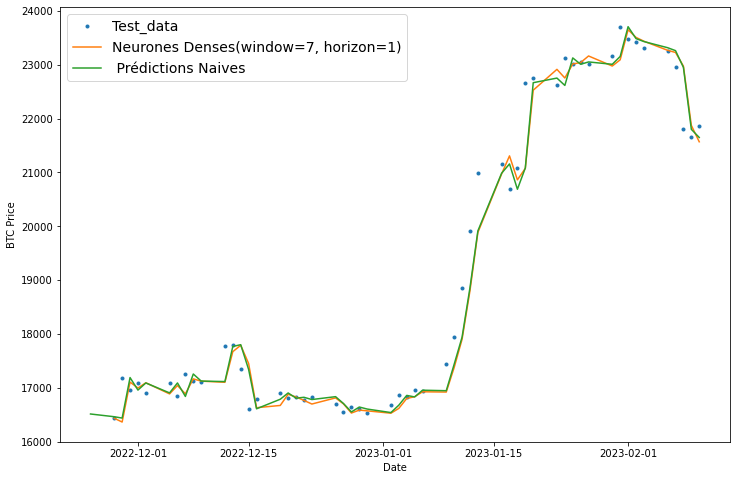

In [136]:
offset = 600
plt.figure(figsize=(12, 8))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Neurones Denses(window=7, horizon=1)")
plot_time_series(timesteps=X_test[1:], values=predictions_naive, format="-", start=offset, label=" Prédictions Naives")

Comme nous pouvons le remarquer, les données naives et les résultats du réseaux de neurones denses se superposent presque parfaitement. Notre modèle a donc bien appris l'information et la relation entre les prix du __BTC__ mais fait moins bien que le modèle naif. Notons que ces prédictions sont seulement sur le jeu de test ! Ce ne sont pas les vrais prédictions ou prédictions actuelles concernant le vrai futur de notre modèle et ce a quoi ressemblerait le __BTC__ en 2023. Ces prédictions ont pour but de **seulement** quantifier la performance de notre modèle. Nous verrons plus tard les prédictions réelles de **tous nos modèles**, et nous allons les comparer.

Un modèle de réseaux de neurones denses sur 1 semaine et 1 jour fait moins bien que le modèle naif en terme de précision et de métriques, et si nos données historiques n'étaient pas suffisantes ? Autrement dit, plutot que de prendre 1 semaine de jeu de données de __BTC__, et si l'on prenait 30 jours , donc 1 mois de données hostorique ?

## Modèle 2 : Réseaux de neurones dense ( window=30, horizon=1)

Nous allons cette fois ci utiliser une plus grande base de données historiques pour prédire le prix du __BTC__. En effet, intuitivement, en utilisant une plus grande base de données historiques, nous nous attendons a ce que ce nouveau modèle de DL performe mieux que le précédent de 7 jours et 1 jour car elle dispose de plus de données historiques pour la modélisation. 

Les fonction précédemment développées nous permettront de gagner cette fois-ci un temps É-norme dans l'implémentation de ce nouveau modèle. En effet, nous disposons de toutes les fonctions nécessaires a l'établissement d'un nouveau modèle de DL, ce qui nous permet de passer rapidement a la phase de modélisation et de scaler notre code. Nos fonctions de pré-processing nous seront utiles dans tout notre projet, et nous éviterons de ré-écrire le meme code encore et encore. Passons sans plus tarder au second modèle de DL. 

> Comme précédemment, nous devons avoir la matrice X et y

In [137]:
HORIZON = 1 
WINDOW = 30 

In [138]:
full_windows, full_labels = make_windows(prices,window_size=WINDOW,horizon=HORIZON)
len(full_windows),len(full_labels)

(3251, 3251)

> Splitting des données en données d'entrainement et de test

In [139]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2600, 651, 2600, 651)

Nos données sont pretes pour utilisation ! 
Passons a la modélisation. 

In [140]:
tf.random.set_seed(42)

# Création du second modèle ayant exactement la meme architecture que le premier 
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

2023-03-12 21:33:41.730331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 21:33:42.001044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


> Le second modèle a fini son apprentissage. Vérifions sa performance sur la meilleure itération sauvegardée. 

In [141]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 5ms/step - loss: 1152.2445


2023-03-12 21:34:07.931492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1152.2445068359375

In [142]:
model_2_preds = make_preds(model_2, input_data=test_windows)

2023-03-12 21:34:08.146823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [143]:
model_2_metrics = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                 y_pred=model_2_preds)
model_2_metrics

{'mae': 1152.2444,
 'mse': 3058535.0,
 'rmse': 1748.867,
 'mape': 3.2934778,
 'mase': 1.0782374}

In [144]:
list_of_dict = [resulats_preds_naive,model_1_metrics,model_2_metrics]

In [145]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,1060.370117,2712415.50,1646.941284,3.011978,0.998684
"Modèle dense (window=7, horizon=1)",1062.396729,2713111.75,1647.152588,3.027360,0.999544
"Modèle dense (window=30, horizon=1)",1152.244385,3058535.00,1748.866943,3.293478,1.078237


Le modèle dense de 30 jours de données historiques et 1 jour de prédiction fait moins bien que le modèle de 7 jours qui lui meme fait moins bien que le modèle naif. Par conséquent, avoir un plus grand jeu de données historiques n'améliore pas la capacité que l'on a à prédire le prix du __BTC__ selon les modèles de deep learning.  

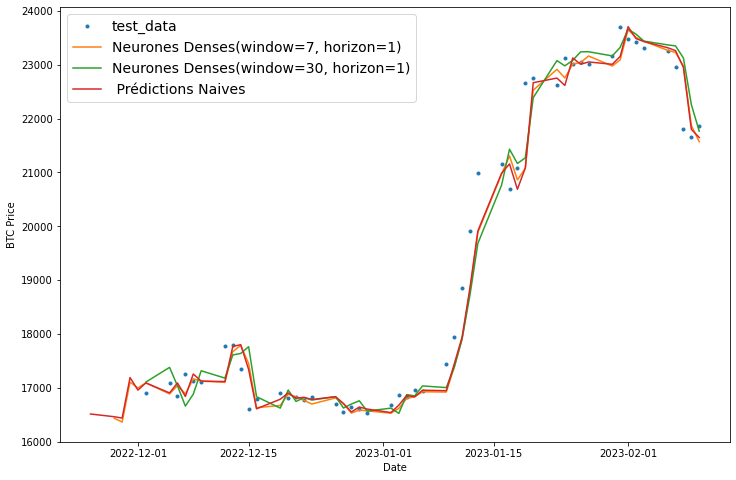

In [146]:
offset = 600
plt.figure(figsize=(12, 8))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows)-4:], values=model_1_preds, start=offset, format="-", label="Neurones Denses(window=7, horizon=1)")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Neurones Denses(window=30, horizon=1)")
plot_time_series(timesteps=X_test[1:], values=predictions_naive, format="-", start=offset, label=" Prédictions Naives")

## Modèle 3 : Réseaux de neurones convolutionnels : Conv1D ( window=7, horizon=1)

Nous allons dans cette partie, nous allons utiliser les réseaux de neurones **séquentiel** pour éssayer de prédire le cours du __BTC__. Ce qui justifie ce choix est la forme première des données. Vu que nous sommes en présence de données séquentielles, utiliser un modèle de réseaux de neurones séquentiel ou **seq2seq** pour prédire la **suite de la séquence d'observation de prix que nous avons** savère judicieux et peut nous permettre en conséquence d'améliorer drastiquement les performances de notre modèle. 

Les réseaux de neurones convolutionnels sont de base utilisé pour prédire le **computer vision** ou les images. Cependant, les réseaux de neurones convolutionnels peuvent etre utilisé pour prédire des **séquences**. La seule différence est la dimension du réseau de neurones. Pour prédire une séquence, on utilise un réseau de neurones convolutionnel a 1 dimension d'ou le terme **conv1D** alors que pour prédire des images, on utilise un réseau de neurones convolutionnels a deux dimensions d'ou le terme **conv2D**. Vous allons essayer de voir a quel point un réseau convolutionnel 1 dimension est performant pour prédire notre jeu de données.

In [147]:
HORIZON = 1 
WINDOW = 7 

In [148]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(3274, 3274)

In [149]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2619, 655, 2619, 655)

In [150]:
train_windows[0].shape

(7,)

Avant de faire entrer la donnée dans un réseau de neurones récurrents, nous devons nous assurer que la dimension des tenseurs coincident parfaitement auquel car Tensorflow va nous retourner des erreurs de dimension et ne pourra pas compiler le modèle. Pour tout modèle de réseaux de neurones récurrents, cela est une étape indispensable.

In [151]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [152]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_conv1D")


model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_3.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

2023-03-12 21:34:08.975715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 21:34:09.350904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


In [153]:
model_3.summary()

Model: "model_3_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_10 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [154]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_conv1D")
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 6ms/step - loss: 1070.3778


2023-03-12 21:34:55.651051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1070.3778076171875

In [155]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

2023-03-12 21:34:55.885544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11688.353, 11436.903, 11546.239, 11698.439, 11745.678, 11840.099,
       11943.048, 11776.411, 11840.856, 11563.206], dtype=float32)>

In [156]:
model_3_metrics = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_metrics

{'mae': 1070.3777,
 'mse': 2750118.8,
 'rmse': 1658.3481,
 'mape': 3.0517862,
 'mase': 1.007053}

In [157]:
list_of_dict = [resulats_preds_naive,model_1_metrics,model_2_metrics,model_3_metrics]

In [158]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)',
                                 'Modèle Conv1D (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,1060.370117,2712415.50,1646.941284,3.011978,0.998684
"Modèle dense (window=7, horizon=1)",1062.396729,2713111.75,1647.152588,3.027360,0.999544
"Modèle dense (window=30, horizon=1)",1152.244385,3058535.00,1748.866943,3.293478,1.078237
"Modèle Conv1D (window=7, horizon=1)",1070.377686,2750118.75,1658.348145,3.051786,1.007053


Nous voyons clairement que notre modèle de réseaux de neurones récurrents performe mieux que le modèle dense de 30 jours et 1 jour et moins bien toujours que le modèle naif. Le modèle naif est un benchmark et constitue par conséquent un socle sur lequel s'appuyer pour évaluer la performance de nos modèles prédictifs. Jusqu'a l'heure actuelle, il performe nettement mieux que les autres. 

Nous allons a présent, utiliser un autre type de réseaux de neurones récurrents : les **LSTM**. Les LSTM sont des réseaux de neurones qui conservent la mémoire a court terme de données séquentielles. Autrement dit, comment se comporterait un modèle de DL prédictif du prix du __BTC__ sachant que ce dernier se rappelle de son passé court ? Intuitivement, on se dit qu'il devrait performer mieux que le modèle 1 semaine 1 jour pour **suffisamment** se rapprocher du modèle naif. 

## Modèle 4 : Réseaux de neurones récurrents RNN (LSTM)

Le principe d'un RNN est simple : Utiliser des informations du passé pour nous aider avec l'avenir (c'est là que vient le terme "récurrent"). En d'autres termes, prendre une entrée (X) et calculer une sortie (y) en fonction de toutes les entrées précédentes.

Ce concept est particulièrement utile lorsqu'il s'agit de séquences telles que des passages de texte en langage naturel (comme des tweets). Vu que notre série temporelle est une suite séquentielle nous pouvons donc utiliser un LSTM.

In [159]:
HORIZON = 1
WINDOW = 7

In [160]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(128, activation="relu")(x) 

output = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="model_4_lstm")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

2023-03-12 21:34:56.783510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 21:34:57.508558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


In [161]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_lstm/")
model_4.evaluate(test_windows, test_labels)

 1/21 [>.............................] - ETA: 5s - loss: 216.8664

2023-03-12 21:36:36.327417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 8ms/step - loss: 1062.8867


1062.88671875

In [162]:
model_4_preds = make_preds(model_4, test_windows)

2023-03-12 21:36:36.765094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [163]:
model_4_metrics = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_metrics

{'mae': 1062.8868,
 'mse': 2706408.8,
 'rmse': 1645.1166,
 'mape': 3.0273764,
 'mase': 1.0000054}

In [164]:
list_of_dict = [resulats_preds_naive,model_1_metrics,model_2_metrics,model_3_metrics,model_4_metrics]

In [165]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)',
                                 'Modèle Conv1D (window=7, horizon=1)',
                                 'Modèle RNN (LSTM) (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,1060.370117,2712415.50,1646.941284,3.011978,0.998684
"Modèle dense (window=7, horizon=1)",1062.396729,2713111.75,1647.152588,3.027360,0.999544
"Modèle dense (window=30, horizon=1)",1152.244385,3058535.00,1748.866943,3.293478,1.078237
"Modèle Conv1D (window=7, horizon=1)",1070.377686,2750118.75,1658.348145,3.051786,1.007053
"Modèle RNN (LSTM) (window=7, horizon=1)",1062.886841,2706408.75,1645.116577,3.027376,1.000005


Comme dit précédemment, le LSTM performe nettement bien, se rapproche suffisamment du modèle dense de 1 semaine et 1 jour. On remarque également que ce dernier challenge meme sur certaines mésures le modèle naif. C'est pourquoi il reste par conséquent, l'un des modèles les plus utlisés sur les données séquentielles. Ainsi, le modèle des RNN challenge sérieusement et se rapproche suffisamment du modèle naif. Par conséquent, ce modèle représente un candidat potentiel pour prédire le prix du __BTC__.

Tout ce que l'on vient de voir sont des algorithmes de deep learning classiques pour la modélisation des données séquentielles comme les séries temporelles. Comment alors se comportent les algorithmes récents de deep learning qui ont performé dans des compétitons internationales qui sont maintenant des références ? Nous allons voir cette fois un algorithme découvert en 2020 sous le nom des N-BEATS. 

## Modèle 5 : Modèle des N-BEATS ( Neural Basis Expansion Analysis for Interpretable Time Series Forecasting )

**Dans cette section nous allons utiliser des algorithmes récents (2020) pour modéliser le prix de __BTC__.**

Les N-BEATS ont été utiliés la toute première fois lors d'une compétition internationale nommée **M4** en 2020.
**La compétition M4 est mondialement reconnue et est considérée comme l'une des compétitions les plus prestigieuses dans le domaine de la prévision de séries temporelles.** Elle attire des participants de partout dans le monde, y compris des universitaires, des chercheurs, des professionnels et des étudiants.

**Les résultats de la compétition sont publiés dans des revues scientifiques de renom et sont souvent cités dans la littérature scientifique.** La compétition a également un impact important sur la recherche en prévision de séries temporelles en stimulant le développement de nouvelles méthodes de prévision et en promouvant la recherche collaborative internationale.

La compétition M4 est une compétition mondialement reconnue et considérée comme une référence dans le domaine de la prévision de séries temporelles.

**Dans ce projet donc, nous avons tenter de reproduire en Python en partant de zéro, le papier du modèle de l'algorithme vainqueur de la plus prestigieuse des compétitons de prédictions de séries temporelles sur nos données de prix du __BTC__**


**Définition des N-BEATS** :

Les N-BEATS sont un type de modèle de prévision de séries temporelles qui utilise des techniques d'apprentissage automatique pour prédire les tendances et les modèles saisonniers d'une série temporelle donnée.

Le modèle utilise des blocs de neurones appelés "Stacks" qui sont empilés les uns sur les autres pour former un réseau de neurones profond. Chaque bloc de neurones est responsable de la prévision d'une période spécifique de la série temporelle.

Pour prédire les tendances et les saisons, le modèle décompose la série temporelle en une base de fonctions prédéfinies. Ensuite, le modèle utilise ces fonctions pour prédire les tendances et les saisons de chaque période.

Les N-BEATS sont conçus pour être interprétables, ce qui signifie que les résultats de la prévision peuvent être facilement expliqués et compris. Cela est possible grâce à la décomposition de la série temporelle en bases de fonctions prédéfinies, ce qui facilite l'analyse et l'interprétation des résultats de la prévision.

Les N-BEATS sont un modèle de prévision de séries temporelles qui utilise des blocs de neurones pour prédire les tendances et les saisons en décomposant la série temporelle en fonctions prédéfinies. Le modèle est conçu pour être interprétable, ce qui signifie que les résultats de la prévision peuvent être facilement compris et expliqués.

En somme, les N-BEATS sont un modèle de prévision de séries temporelles basé sur des réseaux de neurones profonds, conçus pour être universels, interprétables et performants pour une variété de séries temporelles.

Voici le lien du papier officiel des N-BEATS : https://arxiv.org/pdf/1905.10437.pdf

Après les explications, passons a l'implémentation proprement dit des N_BEATS. 

In [166]:
HORIZON = 1
WINDOW_SIZE = 7  # WINDOW_SIZE représente WINDOW dans notre cas. 

Voici comment nous allons procéder : 
- Répliquer l'architecture de modèle de la Figure 1 de l'article N-BEATS en utilisant les mêmes hyperparamètres que l'article, qui peuvent être trouvés dans l'annexe D de l'article N-BEATS. 
- Créer une couche personnalisée pour NBeatsBlock en sous-classant tf.keras.layers.Layer. La création d'une couche personnalisée est utile lorsque TensorFlow n'a pas encore d'implémentation existante d'une couche ou si vous souhaitez faire répéter une configuration de couche un certain nombre de fois (par exemple, comme une pile de blocs N-BEATS).
- Implémenter une architecture personnalisée en utilisant l'API fonctionnelle.
- Trouver un article lié à notre problème et voir comment cela se passe.

Nous créons le N-BEATS block layer en suivant comme dit précédemment l'article du modèle : https://arxiv.org/pdf/1905.10437.pdf . Cette classe contient tous les blocks fondamentaux pour faire tourner notre modèle des N-BEATS. 

**Construction et test du N-BEATS block layer**

In [167]:
class NBeatsBlock(tf.keras.layers.Layer):
    
    def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): 
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

       
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        
        
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

- La classe hérite de tf.keras.layers.Layer (ce qui lui donne toutes les méthodes associées à tf.keras.layers.Layer).
- Le constructeur (def init(...)) prend tous les hyperparamètres de la couche ainsi que l'argument **kwargs.**
     - L'argument **kwargs** prend en charge tous les hyperparamètres qui ne sont pas mentionnés dans le constructeur, tels que input_shape, trainable et name.
- Dans le constructeur, les couches de l'architecture du bloc sont créées :
   - Les couches cachées sont créées comme une pile de couches entièrement connectées avec des unités cachées n_nuerons et une activation ReLU.
   - La couche theta utilise des unités cachées theta_size ainsi qu'une activation linéaire.
- La méthode call() est exécutée lorsque la couche est appelée :
   - Elle passe d'abord les entrées (les données historiques Bitcoin) à travers chacune des couches cachées (une pile de couches entièrement connectées avec une activation ReLU).
   - Après que les entrées aient traversé chacune des couches entièrement connectées, elles sont passées à travers la couche theta où les prédictions de rétroprojection (prédictions en arrière, forme : input_size) et de prévision (prédictions en avant, forme : horizon) sont renvoyées.

> Voyons ce que nous donne notre block de réplication a travers une version légère de notre classe au travers du test de notre classe

In [168]:
# Configurer une couche factice NBeatsBlock pour représenter les entrées et sorties.
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [169]:
# Créer des entrées factices (qui doivent être de la même taille que input_size).
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) 
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [170]:
# Passer les entrées factices à la couche factice NBeatsBlock.
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.24606207 -1.1357768   0.5371487   1.0471828   0.12487816  0.99262536
 -0.9331305 ]
Forecast: -0.4922892153263092


**Préparation des données pour les N-BEATS avec tf.data**

Nous avons maintenant le bloc de construction de base de l'architecture N-BEATS prêt à l'emploi.

Mais avant de l'utiliser pour reproduire l'ensemble de l'architecture générique de N-BEATS, créons des données.

Cette fois, comme nous allons utiliser une architecture de modèle plus grande, afin de garantir que l'entraînement de notre modèle se déroule aussi rapidement que possible, nous configurerons nos ensembles de données en utilisant l'API tf.data.

Et comme l'algorithme N-BEATS se concentre sur des séries chronologiques univariées, nous commencerons par créer des ensembles de données d'entraînement et de test de fenêtres de prix Bitcoin

In [171]:
bitcoin_price.head()

,Close
Date,
2010-07-16,0.0500
2010-07-19,0.0747
2010-07-20,0.0792
2010-07-21,0.0505
2010-07-22,0.0626


In [172]:
bitcoin_prices_nbeats = bitcoin_price.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Close+{i+1}"] = bitcoin_prices_nbeats["Close"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Close,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,
2010-07-27,0.0589,0.0600,0.0545,0.0626,0.0505,0.0792,0.0747,0.0500
2010-07-28,0.0699,0.0589,0.0600,0.0545,0.0626,0.0505,0.0792,0.0747
2010-07-29,0.0627,0.0699,0.0589,0.0600,0.0545,0.0626,0.0505,0.0792
2010-07-30,0.0679,0.0627,0.0699,0.0589,0.0600,0.0545,0.0626,0.0505
2010-08-02,0.0600,0.0679,0.0627,0.0699,0.0589,0.0600,0.0545,0.0626


In [173]:
X = bitcoin_prices_nbeats.dropna().drop("Close", axis=1)
y = bitcoin_prices_nbeats.dropna()["Close"]


split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2619, 2619, 655, 655)

Une fois les bases X_train, X_test, y_train, y_test crées, convertissons les en utilisant l'API de tensorflow **tf.data.Dataset** pour s'assurer que motre modèle converge le plus rapidement possible et prend moins de temps a tourner 

In [174]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


BATCH_SIZE = 1024 # Appendix D dans le N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

**Définition et Réglages des hyperparamètres de l'algorithme des N-BEATS**

Les hyperparamètres sont des paramètres que l'on définit **avant** d'entrainer nos modèles de deep learning. Par exemple HORIZON est un hyperparamètre, WINDOW est un hyperparamètre, BATCH-SIZE est un hyperparamètre, etc.... tandis qu'un paramètre est tout simplement ce que le modèle de deep learning est sensé découvir lui-meme pour nous permettre de faire des prédictions. Par exmple quel est le paramètre mathématique qui lie le prix d'hier au prix d'aujourd'hui ? Quelle équation mathématique gouverne le prix du __BTC__ ? 

Avant de pouvoir lancer notre modèle des N-BEATS, il est indispensable de fixer et définir les hyperparamètres de ce dernier. Les hyperparamètres par défaut qu'utilisent les N-BEATS sont définis dans le **model paper** par les créateurs . En effet, ce sont les **paramètres recommandés par les créateurs**. Ces derniers sont dans l'appendix D de l'article. 

In [175]:
N_EPOCHS = 5000 
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [176]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)


subtracted = layers.subtract([tensor_1, tensor_2])


added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")
     

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


**Compilation et Fitting du modèle des N-BEATS**

In [177]:
 %%time

tf.random.set_seed(42)

# 1. Configurer la couche de blocs N-BEATS.
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Créer l'entrée des piles.
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Créer l'entrée initiale de rétroprojection et de prévision (les prévisions en arrière sont appelées résidus dans le document).
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Créer des piles de blocs.
for i, _ in enumerate(range(N_STACKS-1)): # La première pile est déjà créée dans (3).

  # 5. Utiliser le bloc NBeatsBlock pour calculer la rétroprojection ainsi que la prévision de bloc.
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # Passer les résidus (la rétroprojection) en entrée.

  # 6. Créer la double pile de résidus.
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 

  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Assembler le modèle de pile.
model_5 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_5_N-BEATS")

# 8. Compiler avec la perte MAE et l'optimiseur Adam.
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Adapter le modèle avec les rappels EarlyStopping et ReduceLROnPlateau.
model_5.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # Empêcher une grande quantité de sorties d'entraînement.
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # sauvegarder le modèle à chaque époque consomme beaucoup trop de temps.
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

2023-03-12 21:36:42.903955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 21:36:53.166195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 194: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 294: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 34s, sys: 42.5 s, total: 3min 17s
Wall time: 4min 18s


In [178]:
model_5.evaluate(test_dataset)

1/1 [==============================] - 0s 53ms/step - loss: 1094.3303 - mae: 1094.3303 - mse: 2819905.7500


[1094.330322265625, 1094.330322265625, 2819905.75]

In [179]:
model_5_preds = make_preds(model_5, test_dataset)
model_5_preds[:10]

2023-03-12 21:40:56.522467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11599.888, 11517.168, 11528.685, 11663.614, 11721.281, 11710.46 ,
       11897.524, 11795.236, 11792.383, 11706.724], dtype=float32)>

In [180]:
model_5_metrics = evaluate_preds(y_true=y_test,
                                 y_pred=model_5_preds)
model_5_metrics

{'mae': 1094.3303,
 'mse': 2819905.8,
 'rmse': 1679.2574,
 'mape': 3.1319306,
 'mase': 1.0295887}

In [181]:
list_of_dict = [resulats_preds_naive,model_1_metrics,model_2_metrics,model_3_metrics,model_4_metrics,model_5_metrics]

In [182]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)',
                                 'Modèle Conv1D (window=7, horizon=1)',
                                 'Modèle RNN (LSTM) (window=7, horizon=1)',
                                 'Modèle des N-BEATS (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,1060.370117,2712415.50,1646.941284,3.011978,0.998684
"Modèle dense (window=7, horizon=1)",1062.396729,2713111.75,1647.152588,3.027360,0.999544
"Modèle dense (window=30, horizon=1)",1152.244385,3058535.00,1748.866943,3.293478,1.078237
"Modèle Conv1D (window=7, horizon=1)",1070.377686,2750118.75,1658.348145,3.051786,1.007053
"Modèle RNN (LSTM) (window=7, horizon=1)",1062.886841,2706408.75,1645.116577,3.027376,1.000005
"Modèle des N-BEATS (window=7, horizon=1)",1094.330322,2819905.75,1679.257446,3.131931,1.029589


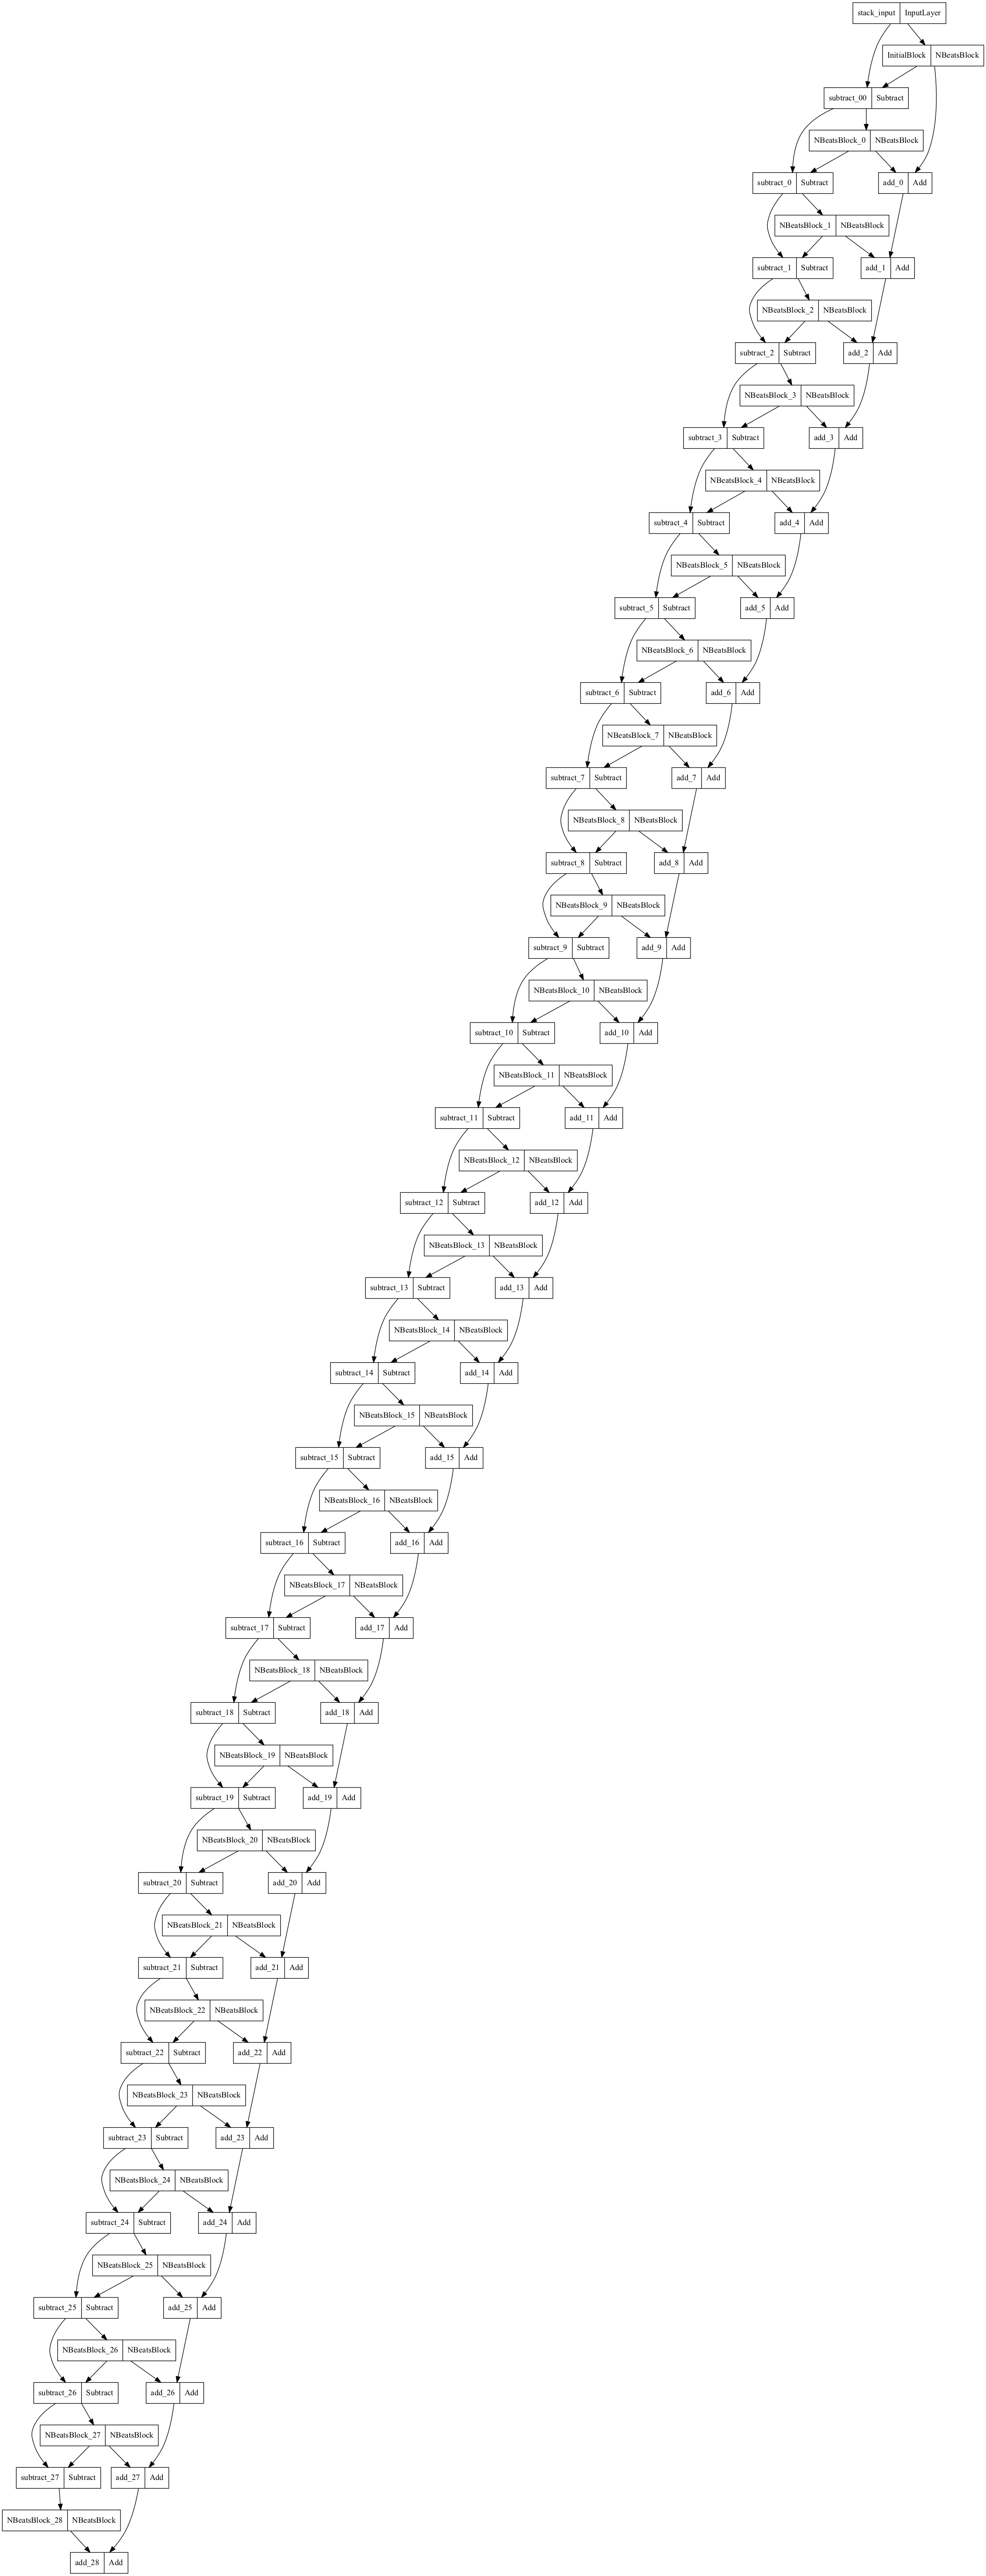

In [183]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

## Étape finale : Entrainer tous nos modèles sur tout notre jeu de données et faire des prédictions : Études critiques et comparatives des prédictions obtenues de chaque modèle et  conclusion ! 

Il est temps de créer un modèle capable de faire des prédictions futures sur le prix du Bitcoin.

Pour faire des prédictions dans l'avenir, nous allons entraîner un modèle sur l'ensemble des données, puis faire des prédictions sur un horizon futur.

Pourquoi utiliser l'ensemble complet de données ?

Auparavant, nous avons divisé nos données en ensembles d'entraînement et de test pour évaluer les performances de notre modèle sur des données pseudo-futures (l'ensemble de test).

Mais étant donné que l'objectif d'un modèle de prévision est de prédire des valeurs dans le véritable avenir, nous n'utiliserons pas d'ensemble de test.

Les modèles de prévision doivent être ré-entraînés chaque fois qu'une prévision est effectuée. Pourquoi ? Parce que si les prix du Bitcoin sont mis à jour quotidiennement et que vous prévoyez le prix de demain, votre modèle ne sera vraiment valable que pour un jour. Lorsqu'un nouveau prix est publié (par exemple le lendemain), vous devrez ré-entraîner votre modèle pour incorporer ce nouveau prix afin de prédire la prochaine prévision.

**Prédictions du future**

> Nous allons définir une variable qui contient le nombre de jour lesquels nous voulons prédire dans le futur ! Nous avons fixé cette variable a 14 jours. Cela signifie que voulons prédire le prix du __BTC__ sur deux semaines a compté du 10 février 2023 !, dernière date d'observation du prx du __BTC__ de notre jeu de données historiques. 

In [184]:
INTO_FUTURE = 14 

Nous allons définir une fonction qui permet, pour chaque modèle que l'on a crée de le ré-entrainer sur toute la base de données historiques et voir les prédicitions de chaque modèle sur 2 semaines. 

Avant de créer cette fonction, nous devons préprocesser nos données de telle sorte que **toute la base de donnée** soit compatible avec les N-BEATS et compatible avec TensorFlow pour que les calculs soient rapides avec **tf.data**. Autrement dit, pour pouvoir utiliser notre modèle de réseaux de neurones des N-BEATS, il faut d'abord  convertir tout le jeu de données historiques en **tensorflow datasets** avec **tf.data.Dataset** comme nous l'avons fait pour la base d'entrainement et de test pour rendre d'une part les données compatibles aux N-BEATS, et d'autre part augmenter le rythme de calcul.

In [185]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(full_windows)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(full_labels)


dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))


BATCH_SIZE = 1024 
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

Nous créons cette fois-ci une fonction __retrain_all_model_on_all_data__ qui permet de ré-entrainer tous nos modèles sur toute la base de données. Cette fonction prend en paramètre :

- model : qui est le nom d'un des modèles que nous avons crées 

- X_all : qui correspond a full_windows donc toute la base de données historiques qui est un historique de 7 jours ou de 30 jours donc notre window 

- y_all : qui correspond a full_labels donc toute la base de prédictions historiques qui est de 1 jour donc notre horizon. Nous nous placons comme dans le cas d'un modèle de machine learning ordinaire 

- dataset_all : X_all et y_all mais converties en tf.data.Dataset pour etre compatibles avec les N-BEATS

In [186]:
def retrain_all_model_on_all_data(model,
                                  X_all = full_windows,
                                  y_all = full_labels,
                                  dataset_all = dataset_all):
    
    if model == 'model_1':
        
        tf.random.set_seed(42)

        model_1 = tf.keras.Sequential([
          layers.Dense(128, activation="relu"),
          layers.Dense(HORIZON, activation="linear")                         
        ], name="model_1_dense") 


        model_1.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

        # Fit model
        model_1.fit(x=X_all, 
                    y=y_all, 
                    epochs=100,
                    verbose=0,
                    batch_size=128)
        
        return model_1
        
    elif model == 'model_3':
        tf.random.set_seed(42)


        model_3 = tf.keras.Sequential([
          layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
          layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
          layers.Dense(HORIZON)
        ], name="model_3_conv1D")


        model_3.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam())


        model_3.fit(X_all,
                    y_all,
                    batch_size=128, 
                    epochs=100,
                    verbose=0)
        
        return model_3
        
    elif model == 'model_4':
        tf.random.set_seed(42)


        inputs = layers.Input(shape=(WINDOW))
        x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
        x = layers.LSTM(128, activation="relu")(x) 

        output = layers.Dense(HORIZON)(x)
        model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="model_4_lstm")

        model_4.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam())


        model_4.fit(X_all,
                    y_all,
                    epochs=100,
                    verbose=0,
                    batch_size=128)
        
        return model_4
        
    else :
        #%%time
        
        tf.random.set_seed(42)

        # 1. Configurer la couche de blocs N-BEATS.
        nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name="InitialBlock")

        # 2. Créer l'entrée des piles.
        stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

        # 3. Créer l'entrée initiale de rétroprojection et de prévision (les prévisions en arrière sont appelées résidus dans le document).
        backcast, forecast = nbeats_block_layer(stack_input)

        residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

        # 4. Créer des piles de blocs.
        for i, _ in enumerate(range(N_STACKS-1)): # La première pile est déjà créée dans (3).

          # 5. Utiliser le bloc NBeatsBlock pour calculer la rétroprojection ainsi que la prévision de bloc.
          backcast, block_forecast = NBeatsBlock(
              input_size=INPUT_SIZE,
              theta_size=THETA_SIZE,
              horizon=HORIZON,
              n_neurons=N_NEURONS,
              n_layers=N_LAYERS,
              name=f"NBeatsBlock_{i}"
          )(residuals) # Passer les résidus (la rétroprojection) en entrée.

          # 6. Créer la double pile de résidus.
          residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 

          forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

        # 7. Assembler le modèle de pile.
        model_5 = tf.keras.Model(inputs=stack_input, 
                                 outputs=forecast, 
                                 name="model_5_N-BEATS")

        # 8. Compiler avec la perte MAE et l'optimiseur Adam.
        model_5.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(0.001),
                        metrics=["mae", "mse"])

        # 9. Adapter le modèle avec les rappels EarlyStopping et ReduceLROnPlateau.
        model_5.fit(dataset_all,
                    epochs=100,
                    verbose=0)
        
        return model_5

Nous crée une seconde fonction __make_future_forecast__ pour faire les prédictions de notre jeu de données. Cette dernière permet de prendre en paramètre des données importantes pour la prédiction des données.

- values : toutes nos observations historiques du __BTC__

- into_future : horizon temporel de prédictions

- window_size : taille du jeu de données historiques 7 ou 30 jours 

In [187]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]
    
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        #print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        
        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
        
    return future_forecast

Cette fonction __get_future_dates__ permet de générer a partir de la toute dernière date de notre jeu de données, les 14 suivantes qui correspondent aux deux semaines de prédictions dans le future. 

- start_date : Date de départ qui est la dernière de notre jeu de données 

- into_future : horizon temporelle de prédiction

In [188]:
def get_future_dates(start_date, into_future, offset=1):
    
    start_date = start_date + np.timedelta64(offset, "D")
    end_date = start_date + np.timedelta64(into_future, "D")
    
    return np.arange(start_date, end_date, dtype="datetime64[D]")

**Calcul des intervalles de confiance**

Nous avons également écrit une fonction qui permet de calculer les intervalles de confiance de nos prédictions qui sont indispensables dans une étude prédictive pour quantifier le dégré de confiance avec lequel nos valeurs prédites tombent dans cet intervalle.

In [205]:
def get_upper_lower(preds): 
    
    std = tf.math.reduce_std(preds, axis=0)
    
    interval = 1.96 * std 
    
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    
    return lower, upper 

**Modèle 1 : Réseaux de neurones denses : window = 7, horizon = 1**

In [189]:
model_1 = retrain_all_model_on_all_data('model_1')

2023-03-12 21:41:02.801213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [190]:
future_forecast_1 = make_future_forecast(values=prices,
                                       model=model_1,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

2023-03-12 21:41:15.041979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [191]:
last_timestep = bitcoin_price.index[-1] # dernière date du jeu de données
last_timestep

Timestamp('2023-02-10 00:00:00', freq='B')

In [192]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps # 14 suivantes qui correspondent aux 2 semaines de prédictions

array(['2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24'], dtype='datetime64[D]')

Pour qu'il n'y ai pas un saut dans notre graphe lorsque nous allons plotter les prédictions vs les données observées, nous allons fusionner la dernière date de notre jeu de données avec les 14 autres suivantes générées pour la prédiction. 

In [193]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast_1 = np.insert(future_forecast_1, 0, prices[-1])
next_time_steps, future_forecast_1

(array(['2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
        '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
        '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
        '2023-02-22', '2023-02-23', '2023-02-24'], dtype='datetime64[D]'),
 array([21865.775, 22012.225, 22246.979, 22521.03 , 22720.19 , 22941.162,
        23173.602, 23397.926, 23627.502, 23863.826, 24098.686, 24336.63 ,
        24577.67 , 24820.424, 25065.576], dtype=float32))

**Modèle 3 : Réseaux de neurones convolutionnels conv1D : window = 7 et horizon = 1.**

In [194]:
model_3 = retrain_all_model_on_all_data('model_3')

2023-03-12 21:41:15.991116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [195]:
future_forecast_3 = make_future_forecast(values=prices,
                                       model=model_3,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

2023-03-12 21:41:33.116665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [196]:
last_timestep = bitcoin_price.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast_3 = np.insert(future_forecast_3, 0, prices[-1])

**Modèle 4 : Réseaux de neurones récurrents (LSTM) : window = 7 et horizon = 1**

In [197]:
model_4 = retrain_all_model_on_all_data('model_4')

2023-03-12 21:41:34.938348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [198]:
future_forecast_4 = make_future_forecast(values=prices,
                                       model=model_4,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

2023-03-12 21:42:10.587364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [199]:
last_timestep = bitcoin_price.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast_4 = np.insert(future_forecast_4, 0, prices[-1])

**Modèle 5 : N-BEATS : window = 7 et horizon = 1**

In [200]:
model_5 = retrain_all_model_on_all_data('model_5')

2023-03-12 21:42:17.108060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [201]:
future_forecast_5 = make_future_forecast(values=prices,
                                       model=model_5,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

2023-03-12 21:44:09.354433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [202]:
last_timestep = bitcoin_price.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast_5 = np.insert(future_forecast_5, 0, prices[-1])

**Comparatifs entre les prédictions de tous nos modèles de DL sur deux semaines**

In [203]:
pd.DataFrame({'Modèle 1 win.=7, horizon=1':future_forecast_1,
             'Modèle 3: Conv1D':future_forecast_3,
             'Modèle 4: LSTM':future_forecast_4,
             'Modèle 5: N-BEATS':future_forecast_5})

,"Modèle 1 win.=7, horizon=1",Modèle 3: Conv1D,Modèle 4: LSTM,Modèle 5: N-BEATS
0,21865.775391,21865.775391,21865.775391,21865.775391
1,22012.224609,21825.507812,21703.531250,22000.857422
2,22246.978516,21874.642578,21632.431641,22068.791016
3,22521.029297,21959.917969,21688.304688,22015.308594
4,22720.189453,22033.320312,21633.914062,22036.773438
5,22941.162109,22088.207031,21543.638672,22083.589844
6,23173.601562,22146.800781,21502.476562,22126.359375
7,23397.925781,22207.914062,21447.832031,22161.574219
8,23627.501953,22265.609375,21376.531250,22185.882812
9,23863.826172,22323.488281,21318.335938,22216.630859


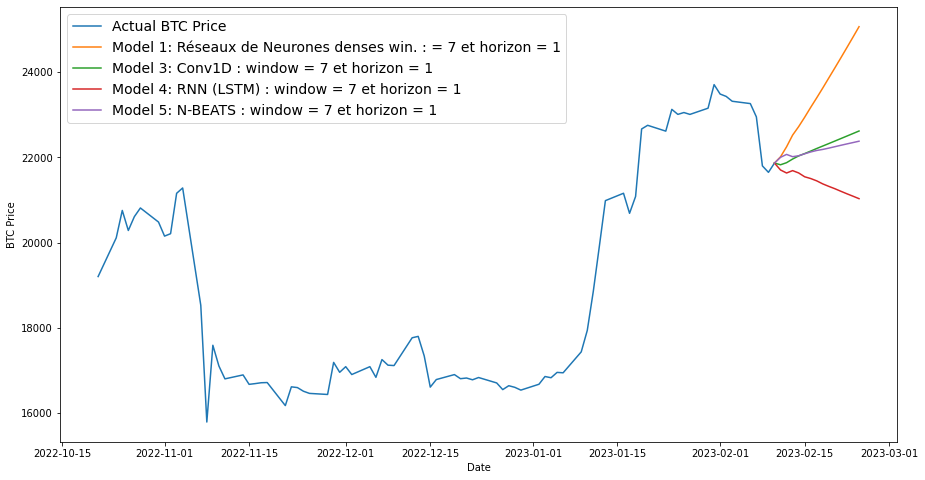

In [204]:
plt.figure(figsize=(15, 8))
plot_time_series(bitcoin_price.index, prices , start=3200, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast_1, format="-", label="Model 1: Réseaux de Neurones denses win. : = 7 et horizon = 1")
plot_time_series(next_time_steps, future_forecast_3, format="-", label="Model 3: Conv1D : window = 7 et horizon = 1")
plot_time_series(next_time_steps, future_forecast_4, format="-", label="Model 4: RNN (LSTM) : window = 7 et horizon = 1")
plot_time_series(next_time_steps, future_forecast_5, format="-", label="Model 5: N-BEATS : window = 7 et horizon = 1")

**Comme vous l'avez remarqué, nous n'avons pas voulu inclure le modèle 2 de 30 jours et 1 jour. En effet, l'architecture du modèle de 30 jours 1 jour est exactement la meme que celui de 7 jours 1 jour. Autrement dit, l'architecture du réseau de neurones (nombre de couches, nombre d'epochs, type de neurones) qui nous a permis de modéliser la base de donnée sur 7 jours et 1 jour est exactement la meme qui nous a permis de modéliser la base de donnée sur 30 jours et 1 jour. Par conséquent, entrainer la meme architecture sur toute la base de donnée pour le modèle 30 jours 1 jour revient exactement a la meme chose que le modèle 7 jours 1 jour.** 

## Conclusion 

Au terme de notre analyse nous pouvons retenir plusieurs choses :

- Au vue des résultats du plot des graphes, aucun des modèles de deep learning ne semble reproduire avec fidélité une courbe qui ressemble a l'historique précédent : Nous pouvons inférer que ce n'est pas parce qu'un modèle de deep learning est sophisitiqué qu'il va nécessairement marcher sur les données.

- Le __BTC__ est un sytème **ouvert** : il est soumis a tellement de facteurs que meme le réseau de neurones le plus sophisitiqué ne peut arriver a capter de telles perturbations. Contrairement a des séries temporelles ordinaires (prédiction de la concentration de C02 dans l'atmosphère), les séries temporelles financières comme les cryptomonnaies sont très imprévisibles et très volatiles. C'est pourquoi on oberve que nos modèles de DL performent pauvrement pour la pluspart 


- Le modèle naif ! La meilleure estimation des observations futures est celle dernièrement observée. Ce modèle est un modèle de choix et de référence en économétrie ! Il est très difficile de battre un tel model. Tous nos réseaux de neurones utilisés n'ont pas réussis a sur-performer le modèle naif. Certains ont néanmoins réussis a se rapprocher suffisamment de ce dernier comme les **LSTM.** 


- La prédiction d'une série temporelle financière et le choix du modèle adéquat a utiliser dépendent du phénomène et de nos besoins. Si nous sommes dans une perspective de challenger un modèle, nous pouvons tenter d'utiliser les outils d'intélligence artificielle qui sont devenues des classiques et incontournables dans les compétitions de séries temporelles. Si par contre nous sommes beaucoup plus focus sur l'interprétabilité des résultats, nous devons utiliser des modèles classiques comme les __GARCH__ qui permettent eux, de modéliser la variance conditionnelle de nos données et prédire la future variance de nos données.  


Cet projet nous a permis d'appréhender la difficulté a prédire une série temporelle financière . Tout d'abord, il est important de reconnaître que la prédiction des prix des crypto-monnaies et des blockchains est un défi complexe. Malgré la sophistication des modèles de Deep Learning que l'on a utilisés, il est possible qu'aucun modèle ne soit capable de prédire avec précision les prix à venir.

Cela peut s'expliquer par plusieurs facteurs, notamment la volatilité extrême des marchés de la crypto-monnaie, la nature décentralisée et souvent spéculative des blockchains, ainsi que les multiples facteurs économiques, politiques et technologiques qui influencent le marché.

Cependant, il est également important de noter que la nature ouverte et transparente des systèmes blockchain offre de nombreuses opportunités pour l'analyse et la prédiction des prix à l'aide de données en temps réel. En effet, les données de la blockchain sont enregistrées de manière décentralisée et immuable, ce qui permet une analyse précise et transparente des mouvements de fonds et des transactions.

Dans l'ensemble, bien que les modèles de Deep Learning que l'on aie utilisé ne soient peut-être pas en mesure de prédire avec précision les prix des blockchains, il est important de reconnaître que la nature ouverte et transparente de ces systèmes offre des opportunités uniques pour l'analyse et la compréhension du marché. De plus, cela souligne l'importance de continuer à explorer de nouvelles méthodes et approches pour prédire les prix des crypto-monnaies et des blockchains à l'aide de l'analyse de données en temps réel. 